<a href="https://colab.research.google.com/github/srikarreddy213/python_tekworks/blob/main/datavisuvalization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

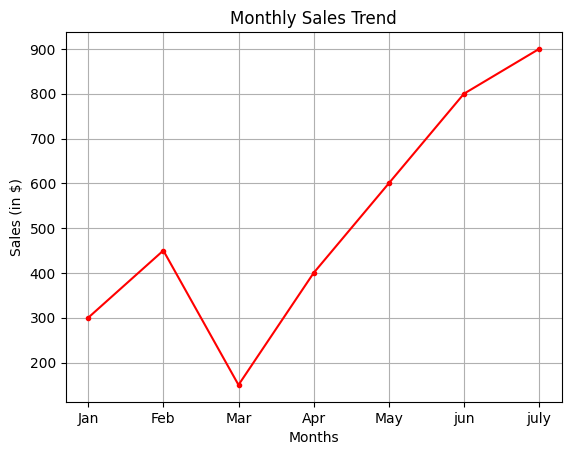

In [ ]:
import matplotlib.pyplot as plt
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May','jun','july']
sales = [300, 450, 150, 400, 600,800,900]
plt.plot(months, sales, color='red', marker='.', linestyle='-')

plt.title("Monthly Sales Trend")
plt.xlabel("Months")
plt.ylabel("Sales (in $)")
plt.grid(True)
plt.show()

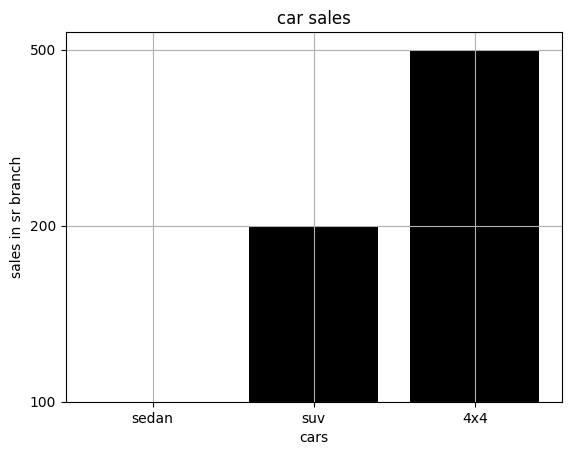

In [ ]:
pro=['sedan','suv','4x4']
c=['100','200','500']
plt.bar(pro,c,color ='black')
plt.title("car sales")
plt.xlabel("cars")
plt.ylabel("sales in sr branch")
plt.grid(True)
plt.show()

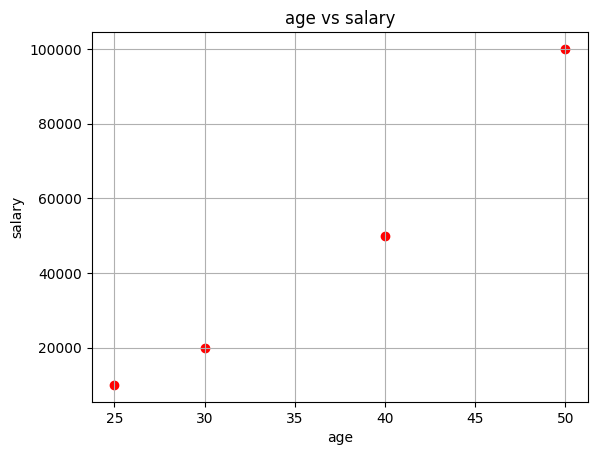

In [ ]:
#show example of scatter plot same as above examples
age=[25,30,40,50]
sal=[10000,20000,50000,100000]
plt.scatter(age,sal,color='red')
plt.title("age vs salary")
plt.xlabel("age")
plt.ylabel("salary")
plt.grid(True)
plt.show()

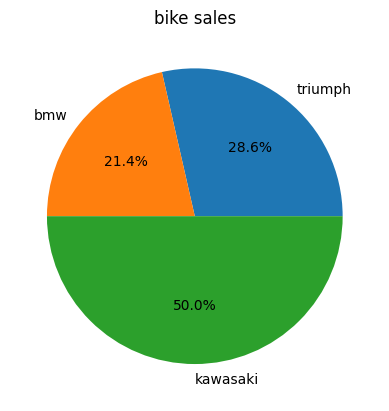

In [ ]:
brand=['triumph','bmw','kawasaki']
sh = [40,30,70]
plt.pie(sh,labels=brand,autopct='%1.1f%%')
plt.title("bike sales")
plt.show()

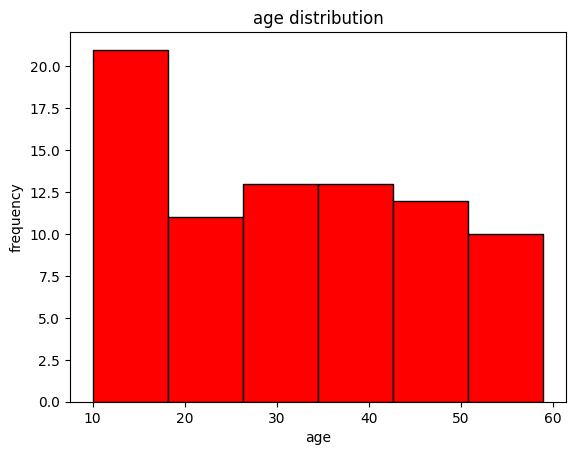

In [ ]:
import numpy as np
age=np.random.randint(10,60,80)
plt.hist(age,bins=6,color='red',edgecolor='black')
plt.title("age distribution")
plt.xlabel("age")
plt.ylabel("frequency")
# plt.grid(True)
plt.show()

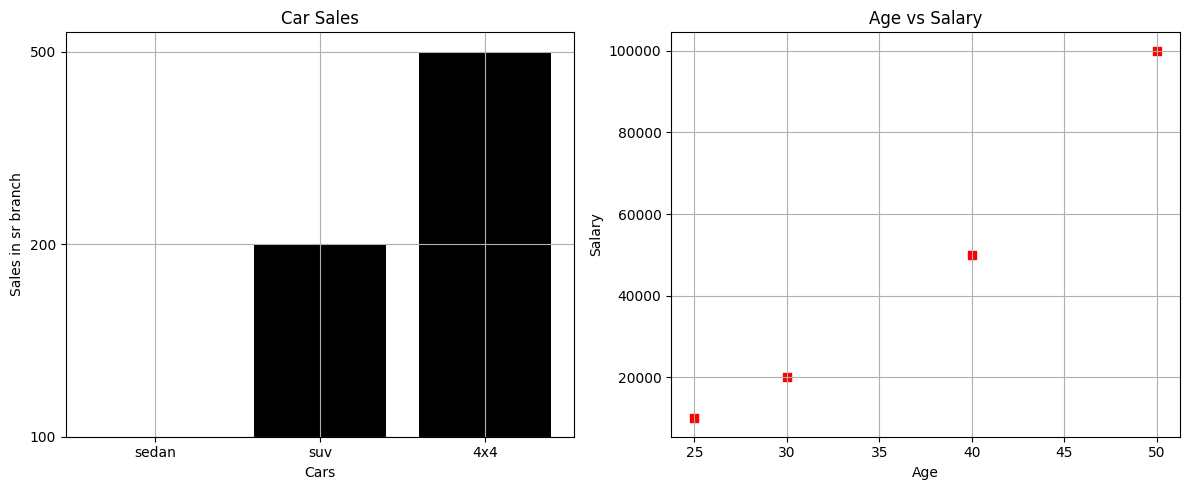

In [ ]:
import matplotlib.pyplot as plt

pro=['sedan','suv','4x4']
c=['100','200','500']

age=[25,30,40,50]
sal=[10000,20000,50000,100000]

# Create a figure with two subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Create the bar plot in the first subplot
axes[0].bar(pro, c, color ='black')
axes[0].set_title("Car Sales")
axes[0].set_xlabel("Cars")
axes[0].set_ylabel("Sales in sr branch")
axes[0].grid(True)

# Create the scatter plot in the second subplot
axes[1].scatter(age, sal, color='red',marker='s')
axes[1].set_title("Age vs Salary")
axes[1].set_xlabel("Age")
axes[1].set_ylabel("Salary")
axes[1].grid(True)

plt.tight_layout()

plt.show()

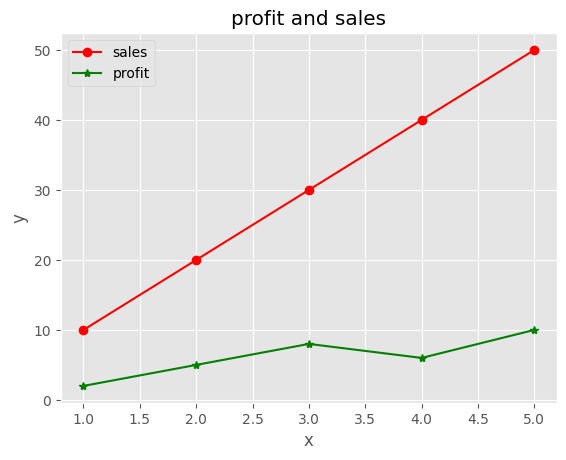

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
x=[1,2,3,4,5]
sales = [10,20,30,40,50]
profit=[2,5,8,6,10]
plt.plot(x,sales,label='sales',color='red',marker='o')
plt.plot(x,profit,label='profit',color='green',marker='*')
plt.title('profit and sales')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [ ]:
path ='/content/drive/MyDrive/Colab Notebooks/data.csv'
import pandas as pd
df=pd.read_csv(path)
print(df.info())
df = df.drop_duplicates()
print(df.info())
# Parse 'Date' column to datetime, coercing errors
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Sort data by date
df = df.sort_values(by='Date')

# Report on invalid/missing dates
invalid_dates_count = df['Date'].isnull().sum()
print(f"\nNumber of rows with invalid or missing dates: {invalid_dates_count}")

# Handle missing values in numeric columns using mean imputation
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
for col in numeric_cols:
    if df[col].isnull().any():
        mean_val = df[col].mean()
        df[col].fillna(mean_val, inplace=True)
        print(f"Filled missing values in '{col}' with the mean ({mean_val:.2f})")

print("\nDataFrame after handling missing values and sorting by date:")
print(df.info())
print("\nFirst 5 rows of the processed DataFrame:")
display(df.head())

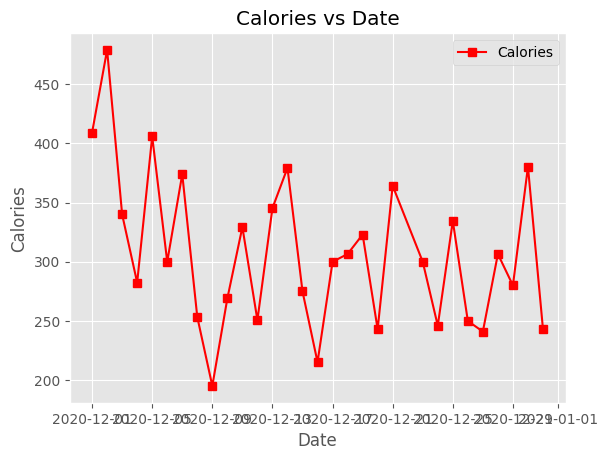

In [ ]:
import matplotlib.pyplot as plt

plt.plot(df['Date'], df['Calories'], color='red', marker='s', label='Calories')
plt.title("Calories vs Date")
plt.xlabel("Date")
plt.ylabel("Calories")
plt.legend()
plt.show()

/tmp/ipython-input-1268072477.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_pulse_by_duration = df.groupby('Duration_Bin')['Pulse'].mean().reset_index()


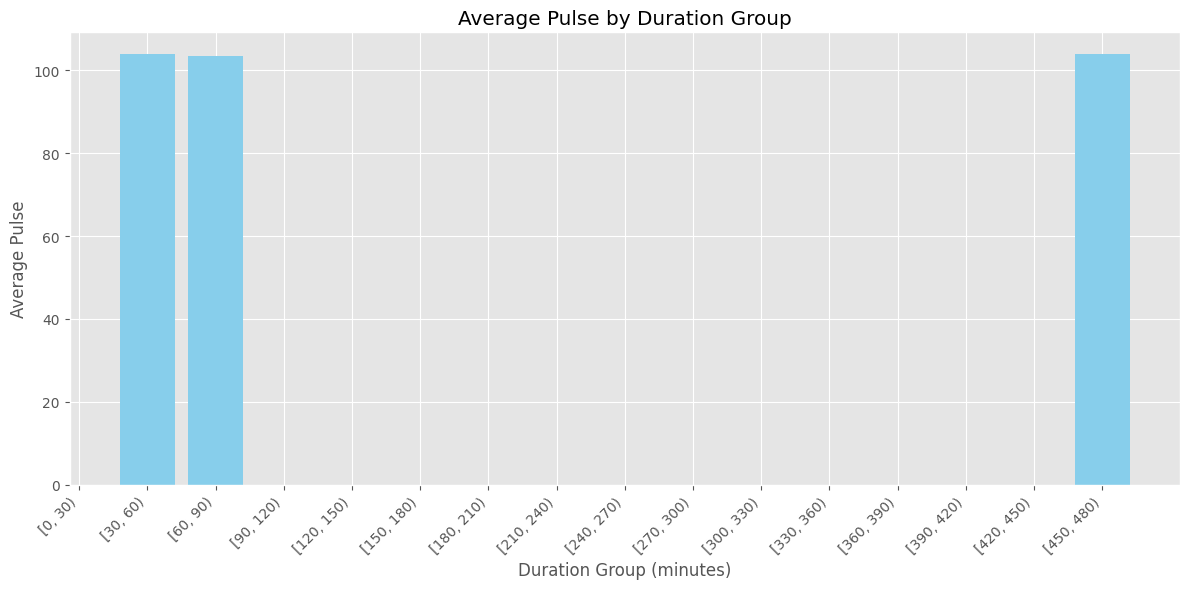

Bar chart saved as bar_avg_pulse_by_duration.png


In [ ]:
path ='/content/drive/MyDrive/Colab Notebooks/data.csv'
import pandas as pd
import matplotlib.pyplot as plt

df=pd.read_csv(path)

# Create duration bins
bins = [0, 30, 60, 90, 120, 150, 180, 210, 240, 270, 300, 330, 360, 390, 420, 450, 480] # Define duration bins
df['Duration_Bin'] = pd.cut(df['Duration'], bins=bins, right=False)

# Group by duration bin and compute average Pulse
avg_pulse_by_duration = df.groupby('Duration_Bin')['Pulse'].mean().reset_index()

# Sort the bins for better visualization
avg_pulse_by_duration = avg_pulse_by_duration.sort_values(by='Duration_Bin')

# Create the bar chart
plt.figure(figsize=(12, 6)) # Adjust figure size for better readability
plt.bar(avg_pulse_by_duration['Duration_Bin'].astype(str), avg_pulse_by_duration['Pulse'], color='skyblue')

plt.title("Average Pulse by Duration Group")
plt.xlabel("Duration Group (minutes)")
plt.ylabel("Average Pulse")
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for readability
plt.tight_layout() # Adjust layout

# Save the plot as a PNG file
plt.savefig('bar_avg_pulse_by_duration.png')

plt.show()

print("Bar chart saved as bar_avg_pulse_by_duration.png")

Pearson correlation coefficient between Duration and Calories: -0.11


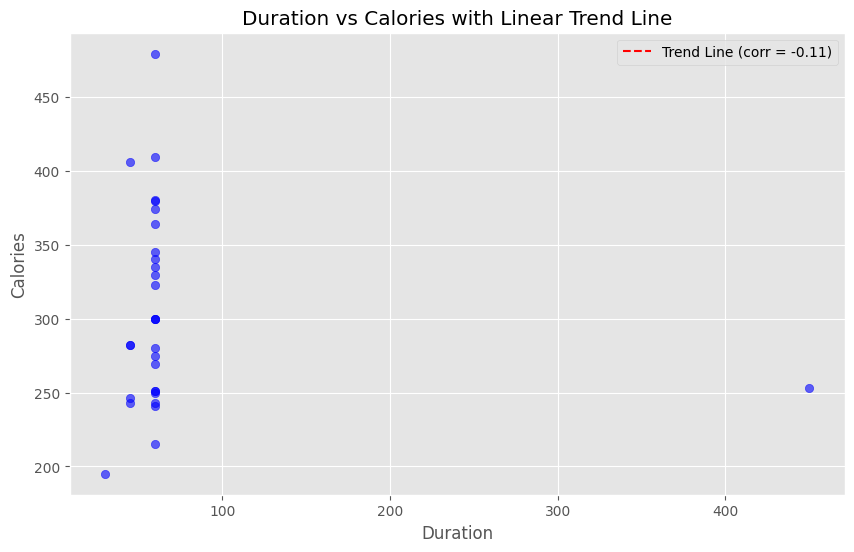

Scatter plot saved as scatter_duration_vs_calories.png


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Assuming df DataFrame is already loaded and cleaned from previous steps

# Plot a scatter plot of Duration vs Calories
plt.figure(figsize=(10, 6))
plt.scatter(df['Duration'], df['Calories'], color='blue', alpha=0.6)

# Compute the Pearson correlation coefficient
correlation = df['Duration'].corr(df['Calories'], method='pearson')
print(f"Pearson correlation coefficient between Duration and Calories: {correlation:.2f}")

# Add a linear trend line to the scatter plot
# Use numpy to fit a first-degree polynomial (linear)
z = np.polyfit(df['Duration'], df['Calories'], 1)
p = np.poly1d(z)
plt.plot(df['Duration'], p(df['Duration']), color='red', linestyle='--', label=f'Trend Line (corr = {correlation:.2f})')

plt.title("Duration vs Calories with Linear Trend Line")
plt.xlabel("Duration")
plt.ylabel("Calories")
plt.legend()
plt.grid(True)

# Save the plot as a PNG file
plt.savefig('scatter_duration_vs_calories.png')

plt.show()

print("Scatter plot saved as scatter_duration_vs_calories.png")

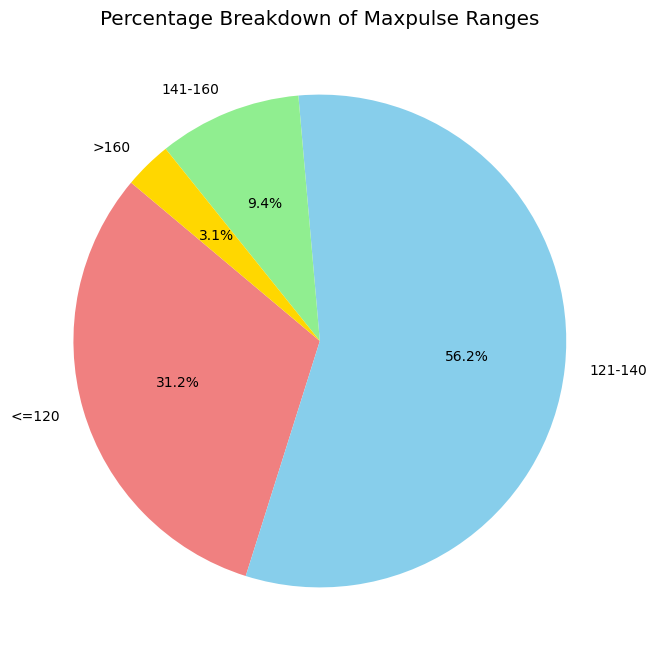

Pie chart saved as pie_maxpulse_ranges.png


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming df DataFrame is already loaded and cleaned from previous steps

# Define Maxpulse ranges
bins = [0, 121, 141, 161, float('inf')]
labels = ['<=120', '121-140', '141-160', '>160']

# Create a new column with Maxpulse ranges
df['Maxpulse_Range'] = pd.cut(df['Maxpulse'], bins=bins, labels=labels, right=False)

# Count the occurrences in each range
maxpulse_counts = df['Maxpulse_Range'].value_counts().sort_index()

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(maxpulse_counts, labels=maxpulse_counts.index, autopct='%1.1f%%', startangle=140, colors=['lightcoral', 'skyblue', 'lightgreen', 'gold'])

plt.title("Percentage Breakdown of Maxpulse Ranges")

# Save the plot as a PNG file
plt.savefig('pie_maxpulse_ranges.png')

plt.show()

print("Pie chart saved as pie_maxpulse_ranges.png")

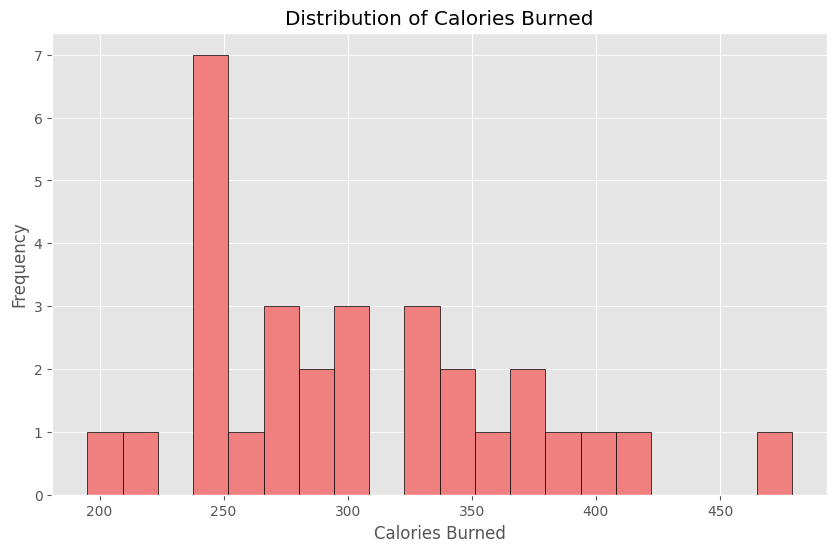

Histogram saved as hist_calories.png


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd # Assuming pandas is needed for the DataFrame

# Assuming df DataFrame is already loaded and cleaned from previous steps

# Plot a histogram of Calories
plt.figure(figsize=(10, 6))
plt.hist(df['Calories'], bins=20, color='lightcoral', edgecolor='black') # Using 20 bins as a starting point

plt.title("Distribution of Calories Burned")
plt.xlabel("Calories Burned")
plt.ylabel("Frequency")
plt.grid(axis='y', alpha=0.75)

# Comment on shape and skewness (based on typical exercise data, adjust if actual plot differs)
# A histogram of calories burned during exercise is often skewed to the right,
# meaning there are more instances of lower calorie burns and fewer instances of very high calorie burns.
# The shape might also show one or more peaks depending on the types of activities recorded.


# Save the plot as a PNG file
plt.savefig('hist_calories.png')

plt.show()

print("Histogram saved as hist_calories.png")

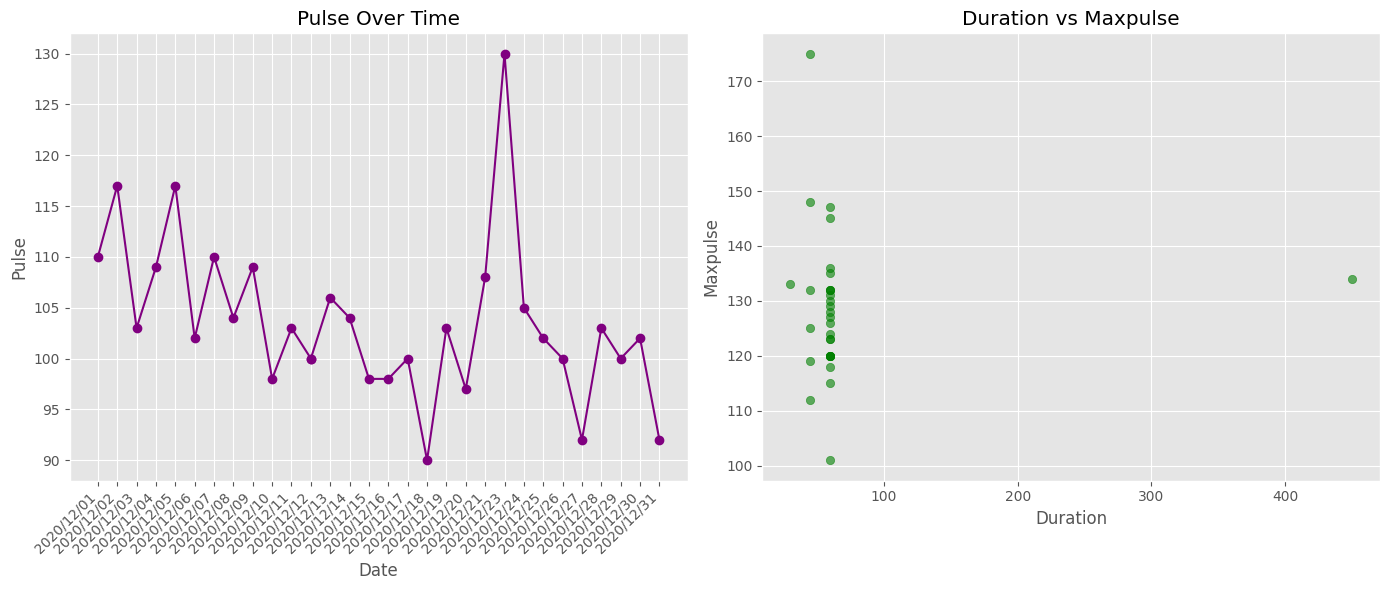

Multi-panel subplot saved as subplots_pulse_duration_maxpulse.png


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming df DataFrame is already loaded and cleaned from previous steps

# Create a figure with two subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(14, 6)) # Adjust figure size for clarity

# Left subplot: Line plot of Pulse over Date
# Filter out rows with NaT in 'Date' column for plotting
df_filtered = df.dropna(subset=['Date'])
axes[0].plot(df_filtered['Date'], df_filtered['Pulse'], color='purple', marker='o', linestyle='-')
axes[0].set_title("Pulse Over Time")
axes[0].set_xlabel("Date")
axes[0].set_ylabel("Pulse")
axes[0].grid(True)
plt.setp(axes[0].get_xticklabels(), rotation=45, ha="right") # Rotate x-axis labels

# Right subplot: Scatter plot of Duration vs Maxpulse
axes[1].scatter(df['Duration'], df['Maxpulse'], color='green', alpha=0.6)
axes[1].set_title("Duration vs Maxpulse")
axes[1].set_xlabel("Duration")
axes[1].set_ylabel("Maxpulse")
axes[1].grid(True)

plt.tight_layout() # Adjust layout to prevent overlapping

# Save the plot as a PNG file
plt.savefig('subplots_pulse_duration_maxpulse.png')

plt.show()

print("Multi-panel subplot saved as subplots_pulse_duration_maxpulse.png")

# Task
Analyze the dataset located at "/content/drive/MyDrive/Colab Notebooks/tip(in).csv" by performing basic data understanding, trend analysis using a line plot, category comparison using a bar plot, value distribution analysis using a histogram, relationship analysis using a scatter plot, outlier and spread analysis using a box plot, proportion analysis using a pie plot, and displaying multiple visualizations using subplots. For each plot, include a markdown note describing the insights revealed. Ensure all plots are customized with titles, labels, legends, and grids where appropriate, using only Matplotlib.

## Load and understand the data

### Subtask:
Load the data from "/content/drive/MyDrive/Colab Notebooks/tip(in).csv" into a pandas DataFrame. Inspect the dataset to understand its structure, identify column names, data types, and check for missing values or anomalies.


**Reasoning**:
The subtask requires loading the data and performing initial inspections using pandas methods. This can be done in a single code block.



In [52]:
import pandas as pd

# Load the data into a pandas DataFrame
file_path = "/content/drive/MyDrive/Colab Notebooks/tip(in).csv"
df = pd.read_csv(file_path)

# Display the first 5 rows
print("First 5 rows of the DataFrame:")
display(df.head())

# Display concise summary of the DataFrame
print("\nDataFrame Info:")
df.info()

# Generate descriptive statistics
print("\nDescriptive Statistics:")
display(df.describe())

First 5 rows of the DataFrame:


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4



DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB

Descriptive Statistics:


,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


## Trend analysis

### Subtask:
Analyze the trend of a suitable numerical variable over time or index using a line plot.


**Reasoning**:
Create a line plot to visualize the trend of 'total_bill' over the DataFrame index.



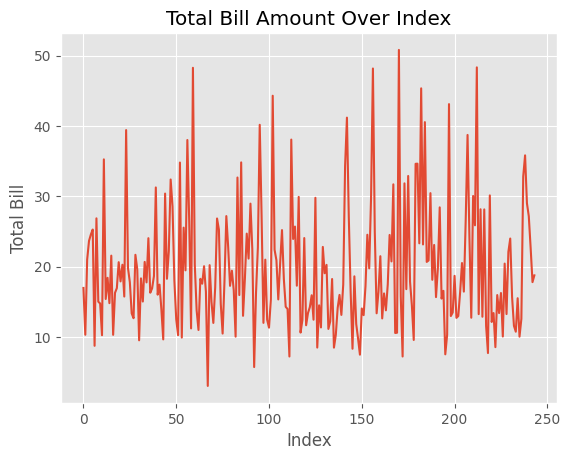

In [53]:
import matplotlib.pyplot as plt

# Create a line plot of total_bill over the index
plt.plot(df.index, df['total_bill'])

# Add title and labels
plt.title("Total Bill Amount Over Index")
plt.xlabel("Index")
plt.ylabel("Total Bill")

# Add a grid
plt.grid(True)

# Display the plot
plt.show()

## Category comparison

### Subtask:
Compare categories based on a numerical variable using a bar plot.


**Reasoning**:
Group the DataFrame by 'day', calculate the mean of 'total_bill', and create a bar plot to visualize the average total bill for each day.



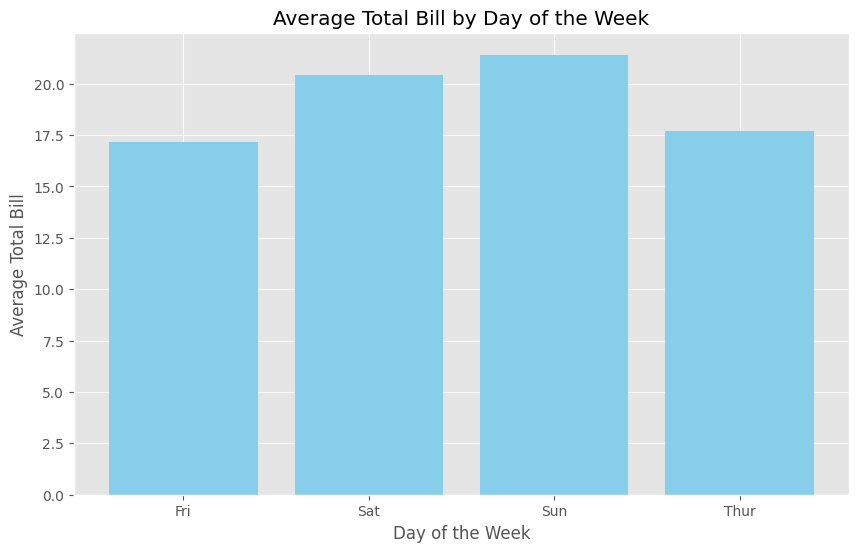

In [54]:
import matplotlib.pyplot as plt

# Group by 'day' and calculate the mean of 'total_bill'
average_total_bill_by_day = df.groupby('day')['total_bill'].mean()

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(average_total_bill_by_day.index, average_total_bill_by_day.values, color='skyblue')

# Add title and labels
plt.title("Average Total Bill by Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Average Total Bill")

# Add a grid
plt.grid(axis='y', alpha=0.75)

# Display the plot
plt.show()

**Reasoning**:
The bar plot has been created and displayed. Now, add a markdown cell to describe the insights from the plot as requested in the subtask instructions.



In [55]:
# Insights from the bar plot:
# The bar plot clearly shows the average total bill for each day of the week.
# We can observe which days have the highest and lowest average total bills.
# This visualization helps in understanding the daily spending patterns of customers.

## Value distribution

### Subtask:
Visualize the distribution of values in a numerical column using a histogram.


**Reasoning**:
Create a histogram for the 'total_bill' column with appropriate bins, add title, labels, and a grid, and then display the plot.



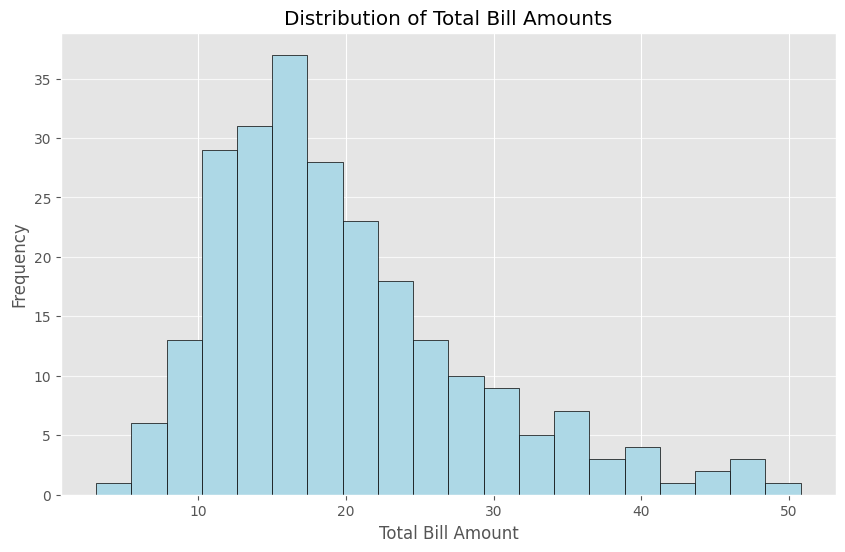

In [56]:
# Create a histogram for the 'total_bill' column
plt.figure(figsize=(10, 6))
plt.hist(df['total_bill'], bins=20, color='lightblue', edgecolor='black')

# Add title and labels
plt.title("Distribution of Total Bill Amounts")
plt.xlabel("Total Bill Amount")
plt.ylabel("Frequency")

# Add a grid
plt.grid(axis='y', alpha=0.75)

# Display the plot
plt.show()

**Reasoning**:
Add a markdown cell to describe the insights revealed by the histogram plot.



In [57]:
# Insights from the histogram:
# The histogram shows the frequency distribution of total bill amounts.
# The distribution appears to be skewed to the right, indicating that most total bills are lower, with fewer instances of very high total bills.
# The bulk of the total bills seem to fall within a certain range, with frequencies tapering off as the total bill amount increases.
# There might be some outliers on the higher end of the total bill amounts, represented by bars with low frequency far from the peak.

## Relationship analysis

### Subtask:
Examine the relationship between two numerical variables using a scatter plot.


**Reasoning**:
Create a scatter plot to visualize the relationship between 'total_bill' and 'tip', and add title, labels, and grid as requested.



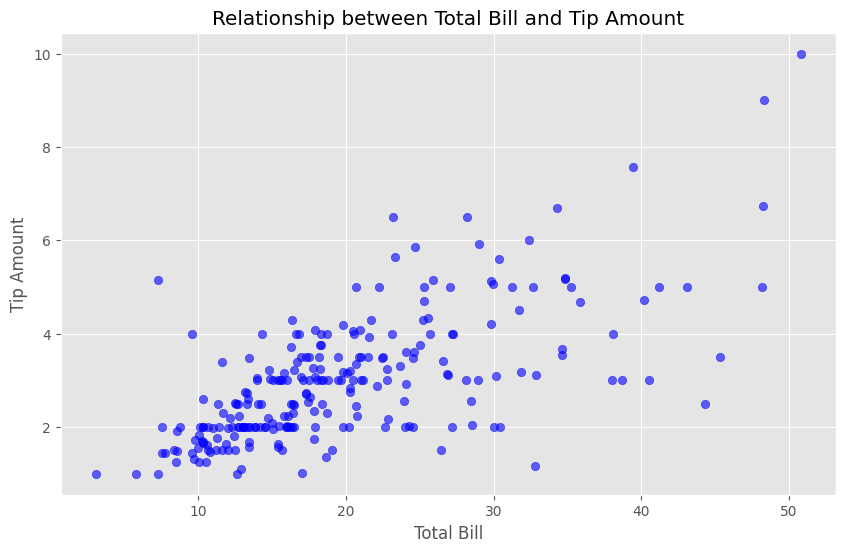

In [58]:
import matplotlib.pyplot as plt

# Create a scatter plot of 'total_bill' vs 'tip'
plt.figure(figsize=(10, 6))
plt.scatter(df['total_bill'], df['tip'], color='blue', alpha=0.6)

# Add title and labels
plt.title("Relationship between Total Bill and Tip Amount")
plt.xlabel("Total Bill")
plt.ylabel("Tip Amount")

# Add a grid
plt.grid(True)

# Display the plot
plt.show()

**Reasoning**:
Add a markdown cell to describe the insights from the scatter plot as requested in the instructions.



In [59]:
```markdown
# Insights from the scatter plot:
# The scatter plot visualizes the relationship between the total bill amount and the tip amount.
# Generally, there appears to be a positive correlation: as the total bill increases, the tip amount also tends to increase.
# However, there is also a noticeable spread in the tip amounts for similar total bill values, indicating variability in tipping behavior.
# The plot helps in identifying any patterns or clusters, as well as potential outliers where the tip amount is unusually high or low relative to the total bill.

SyntaxError: invalid syntax (ipython-input-985473954.py, line 1)

## Outlier and spread analysis

### Subtask:
Analyze the spread and identify outliers in a numerical column across different categories using a box plot.


**Reasoning**:
Create a box plot to visualize the spread and outliers of 'total_bill' grouped by 'day'.



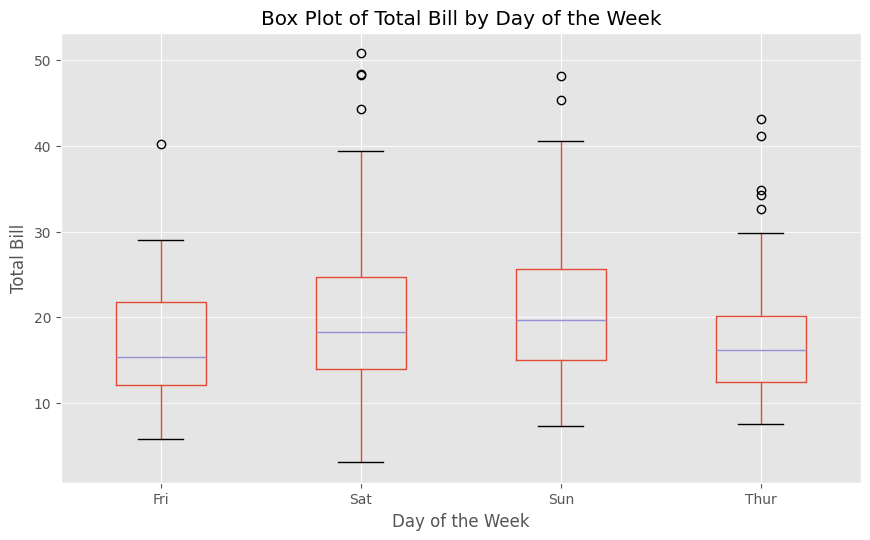

In [60]:
import matplotlib.pyplot as plt

# Create a box plot of total_bill by day
df.boxplot(column='total_bill', by='day', figsize=(10, 6))

# Add title and labels
plt.title("Box Plot of Total Bill by Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Total Bill")

# Add a grid
plt.grid(axis='y', alpha=0.75)

# Display the plot
plt.suptitle('') # Suppress the default suptitle generated by boxplot

plt.show()

**Reasoning**:
Add a markdown cell below the plot to explain the insights revealed by the box plot regarding the spread and outliers of 'total_bill' across different days.



In [66]:

# Insights from the box plot:
# The box plot shows the distribution, spread, and potential outliers of 'total_bill' for each day of the week.
# By comparing the boxes, we can see differences in the median total bill, the interquartile range (IQR - the height of the box), and the overall spread across different days.
# The whiskers extend to show the range of the data within 1.5 times the IQR from the quartiles.
# Points beyond the whiskers are considered potential outliers and are plotted individually.
# This plot helps identify which days have more variable total bills and if there are any days with unusually high or low bills compared to the typical range for that day.

## Proportion analysis

### Subtask:
Show the proportion of different categories using a pie plot.


**Reasoning**:
Calculate the value counts for the 'day' column and create a pie chart to show the proportion of different days.



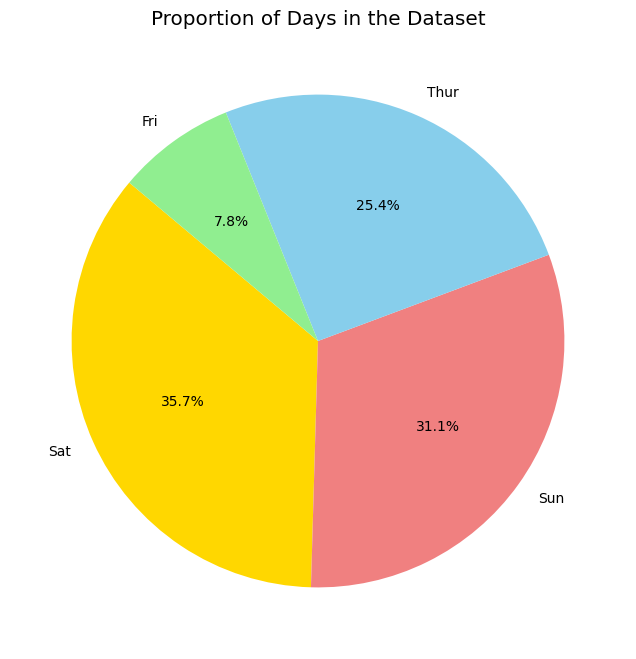

In [62]:
import matplotlib.pyplot as plt

# Calculate the value counts for the 'day' column
day_counts = df['day'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(day_counts, labels=day_counts.index, autopct='%1.1f%%', startangle=140, colors=['gold', 'lightcoral', 'skyblue', 'lightgreen'])

# Set the title of the pie chart
plt.title("Proportion of Days in the Dataset")

# Display the pie chart
plt.show()

**Reasoning**:
Add a markdown cell to describe the insights revealed by the pie plot.



In [69]:
# ```markdown
# Insights from the pie chart:
# The pie chart shows the proportion of observations (presumably dining instances) for each day of the week in the dataset.
# We can clearly see which day accounts for the largest proportion of the data and which day is the smallest.
# The percentages on each slice quantify the distribution across the days.
# This plot helps in understanding the frequency of data collection or customer visits on different days of the week.

## Multiple visualizations

### Subtask:
Create subplots to display multiple visualizations side by side for a combined view of insights.


**Reasoning**:
Create a figure with subplots and plot the scatter plot and bar plot as instructed.



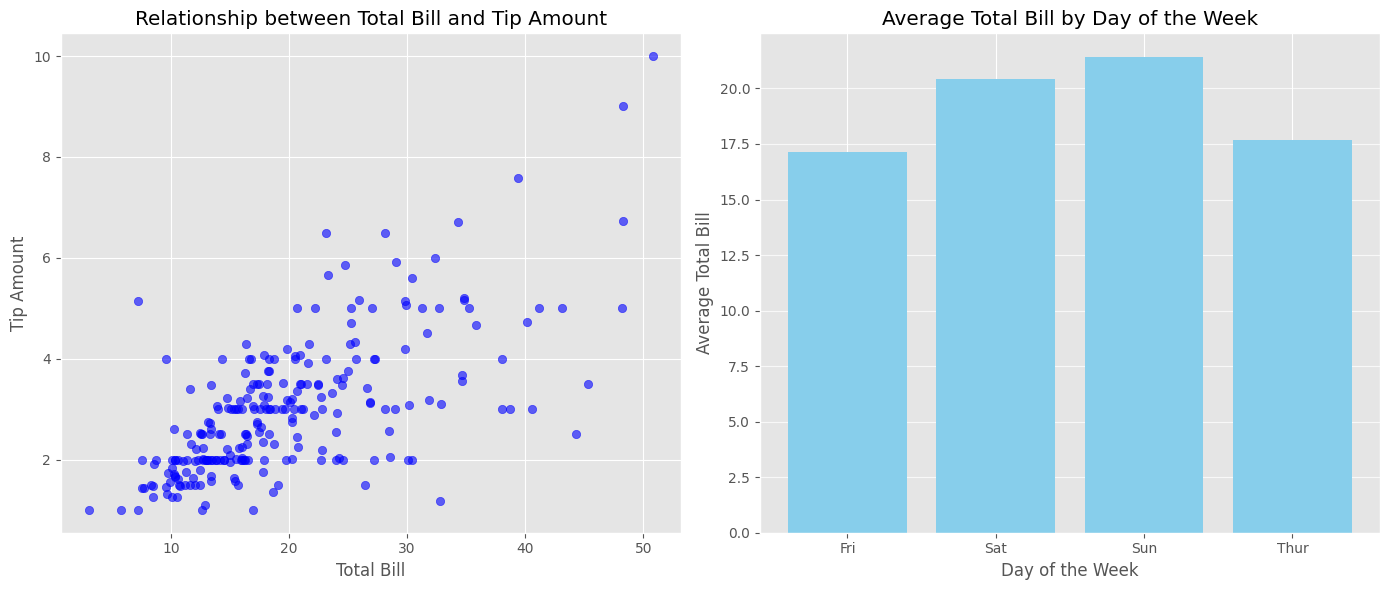

In [64]:
import matplotlib.pyplot as plt

# Create a figure with two subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(14, 6)) # Adjust figure size for clarity

# Left subplot: Scatter plot of 'total_bill' vs 'tip'
axes[0].scatter(df['total_bill'], df['tip'], color='blue', alpha=0.6)
axes[0].set_title("Relationship between Total Bill and Tip Amount")
axes[0].set_xlabel("Total Bill")
axes[0].set_ylabel("Tip Amount")
axes[0].grid(True)

# Recalculate average total bill by day for the bar plot
average_total_bill_by_day = df.groupby('day')['total_bill'].mean()

# Right subplot: Bar plot of the average 'total_bill' by 'day'
axes[1].bar(average_total_bill_by_day.index, average_total_bill_by_day.values, color='skyblue')
axes[1].set_title("Average Total Bill by Day of the Week")
axes[1].set_xlabel("Day of the Week")
axes[1].set_ylabel("Average Total Bill")
axes[1].grid(axis='y', alpha=0.75)

plt.tight_layout() # Adjust layout to prevent overlapping

# Display the figure with the subplots
plt.show()

## Add explanations

### Subtask:
Add markdown cells below each plot to explain what the plot reveals.


# Insights from the pie chart:
# The pie chart shows the proportion of observations (presumably dining instances) for each day of the week in the dataset.
# We can clearly see which day accounts for the largest proportion of the data and which day is the smallest.
# The percentages on each slice quantify the distribution across the days.
# This plot helps in understanding the frequency of data collection or customer visits on different days of the week.

## Summary:

### Data Analysis Key Findings

*   The dataset contains 244 entries and 7 columns, including numerical columns (`total_bill`, `tip`, `size`) and categorical columns (`sex`, `smoker`, `day`, `time`).
*   There are no missing values in the dataset.
*   The average total bill varies by day of the week, indicating differences in daily spending patterns.
*   The distribution of total bill amounts is right-skewed, with most bills being lower and fewer instances of high bills.
*   There is a general positive correlation between the total bill and the tip amount: as the total bill increases, the tip tends to increase.
*   Box plots revealed differences in the median total bill, spread (IQR), and potential outliers across different days of the week.
*   The pie chart showed the proportion of data collected on each day, indicating the frequency of visits or data points per day.

### Insights or Next Steps

*   Investigate the days with the highest and lowest average total bills further to understand the factors contributing to these differences (e.g., time of day, size of party).
*   Analyze the relationship between other categorical variables (sex, smoker, time) and numerical variables (total\_bill, tip) to uncover more detailed patterns in the data.


In [73]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

sns.set_theme(style='whitegrid')

# Load example datasets
tips = sns.load_dataset('tips')
iris = sns.load_dataset('iris')

print('Datasets loaded: tips (rows={}), iris (rows={})'.format(len(tips), len(iris)))

tips.head()

Datasets loaded: tips (rows=244), iris (rows=150)


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


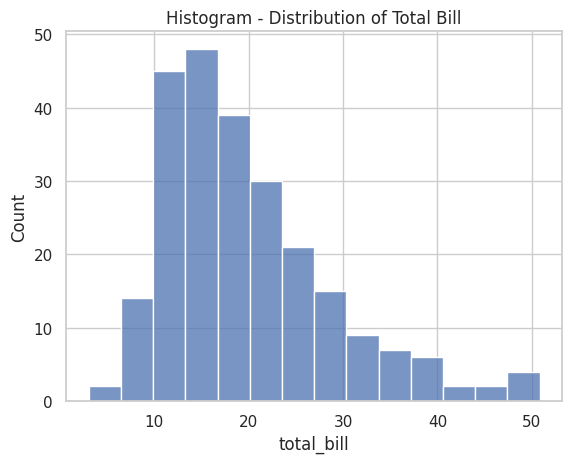

In [76]:
sns.histplot(tips['total_bill'], kde=False)
plt.title('Histogram - Distribution of Total Bill')
plt.show()




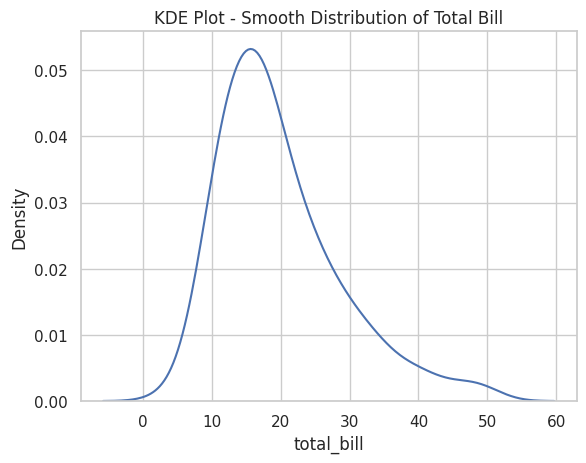

In [75]:
# KDE Plot
sns.kdeplot(tips['total_bill'])
plt.title('KDE Plot - Smooth Distribution of Total Bill')
plt.show()


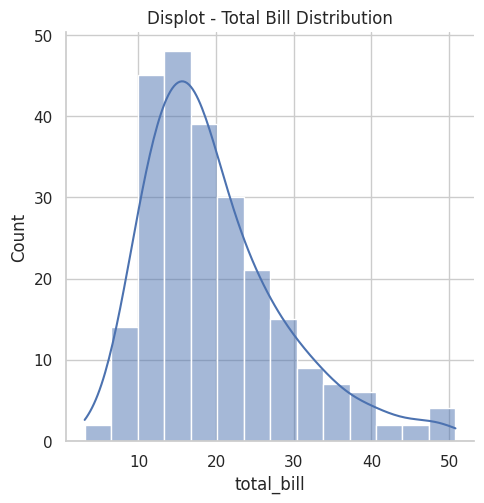

In [77]:

# Displot (Histogram + KDE)
sns.displot(tips['total_bill'], kde=True)
plt.title('Displot - Total Bill Distribution')
plt.show()

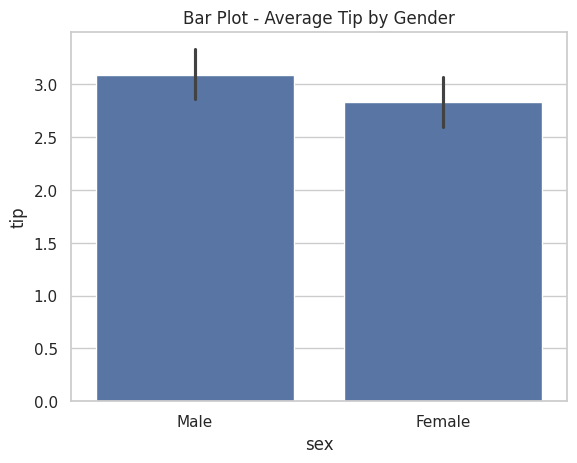

In [78]:
# Bar Plot - Average Tip by Gender
sns.barplot(x='sex', y='tip', data=tips)
plt.title('Bar Plot - Average Tip by Gender')
plt.show()

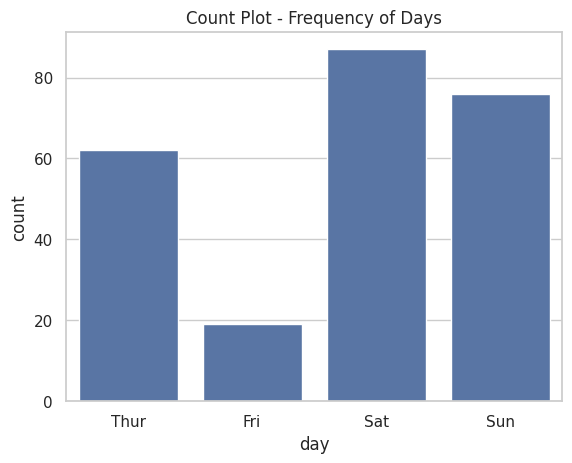

In [79]:

# Count Plot - Frequency of Days
sns.countplot(x='day', data=tips)
plt.title('Count Plot - Frequency of Days')
plt.show()

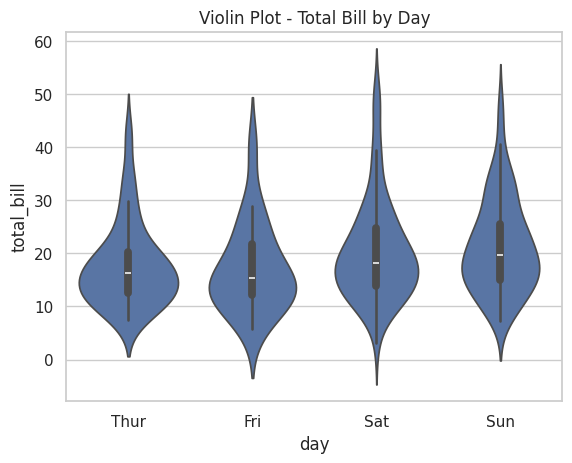

In [80]:
# Violin Plot - Distribution + Summary
sns.violinplot(x='day', y='total_bill', data=tips)
plt.title('Violin Plot - Total Bill by Day')
plt.show()

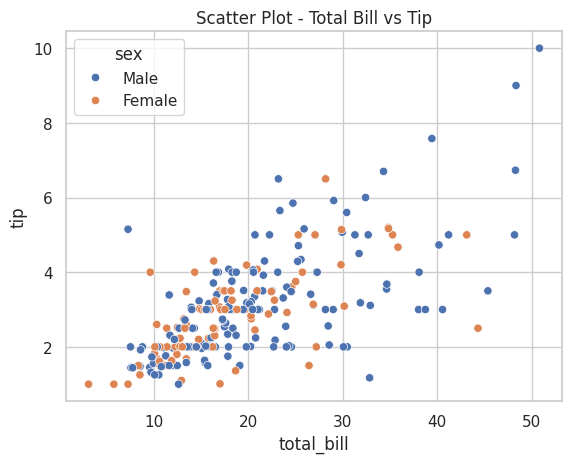

In [81]:
# Scatter Plot - Total Bill vs Tip
sns.scatterplot(x='total_bill', y='tip', data=tips, hue='sex')
plt.title('Scatter Plot - Total Bill vs Tip')
plt.show()

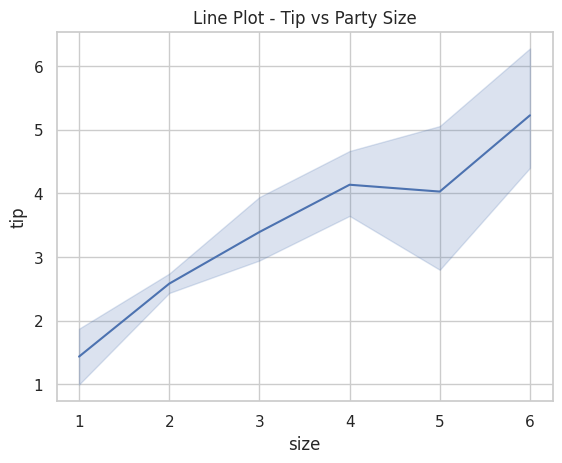

In [82]:
# Line Plot - Tip vs Party Size (useful for trend-like visuals)
sns.lineplot(x='size', y='tip', data=tips)
plt.title('Line Plot - Tip vs Party Size')
plt.show()

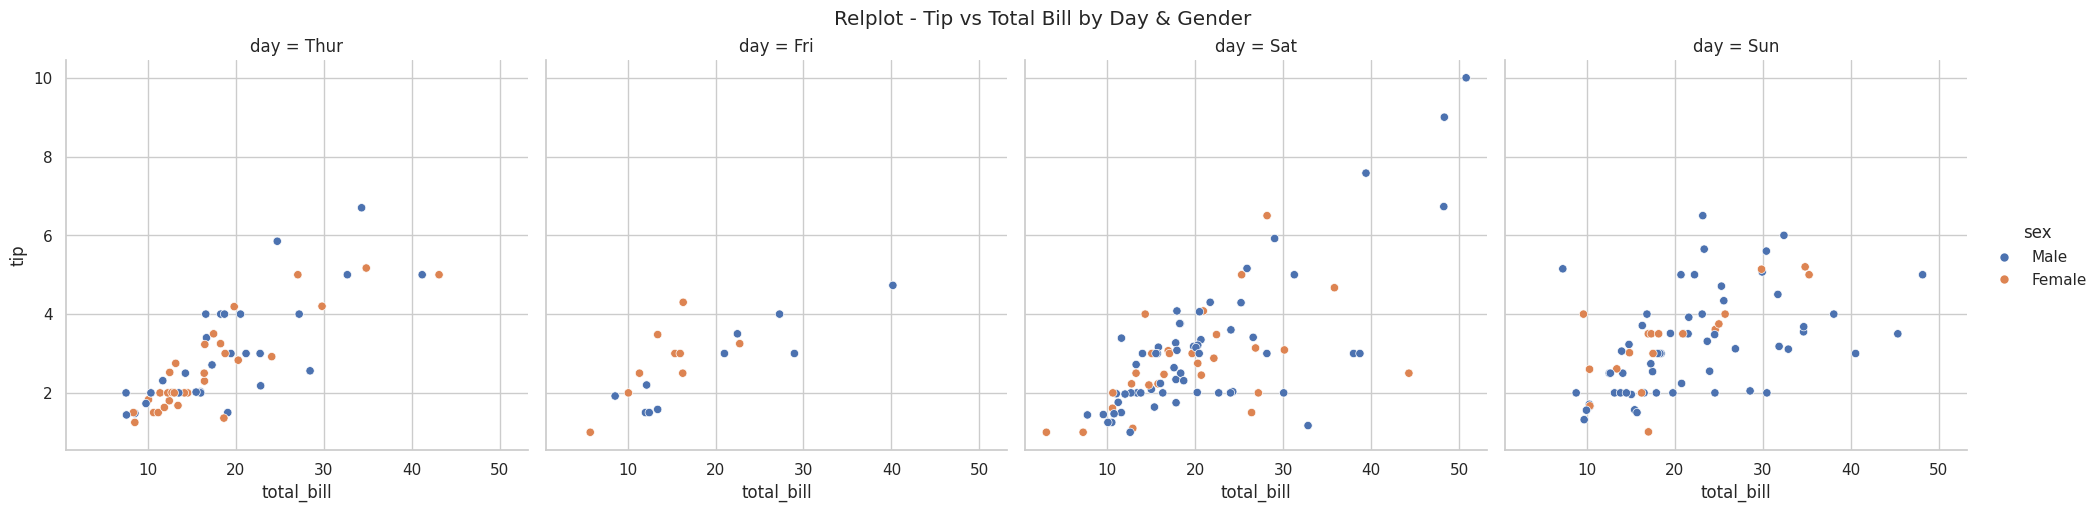

In [83]:
# Relplot with Facets
sns.relplot(x='total_bill', y='tip', hue='sex', col='day', data=tips)
plt.suptitle('Relplot - Tip vs Total Bill by Day & Gender', y=1.02)
plt.show()

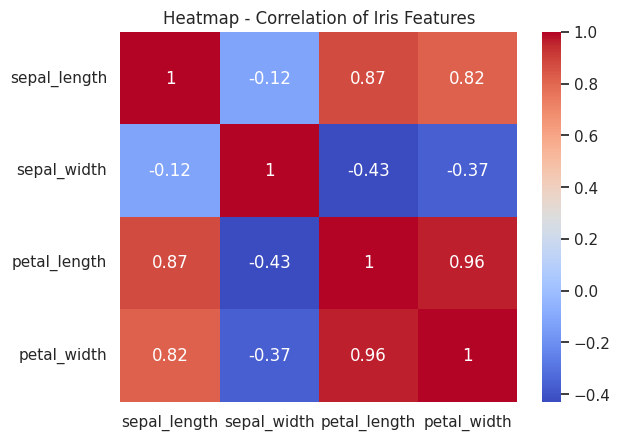

In [84]:
# Select only numeric columns
iris_num = iris.select_dtypes(include=['float', 'int'])

# Compute correlation
corr = iris_num.corr()

# Plot the heatmap
sns.heatmap(corr, annot=True,cmap='coolwarm')
plt.title("Heatmap - Correlation of Iris Features")
plt.show()

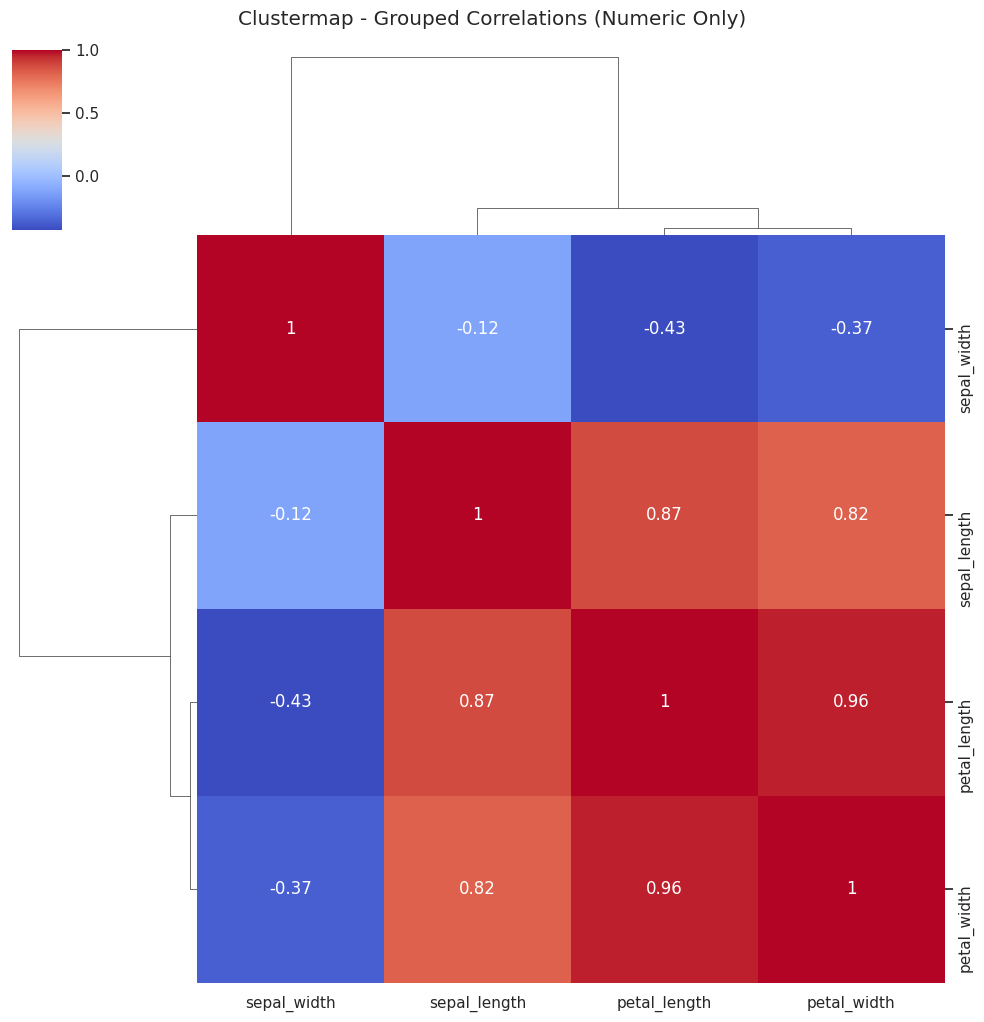

In [85]:
# Select only numeric columns (exclude 'species')
iris_num = iris.select_dtypes(include=['float', 'int'])

# Compute correlation matrix
corr = iris_num.corr()

# Create the clustermap
sns.clustermap(corr, cmap='coolwarm', annot=True)
plt.suptitle('Clustermap - Grouped Correlations (Numeric Only)', y=1.02)
plt.show()

In [ ]:
# Visualization Task (seaborn Matplotlib)





#  1.

# A. Numerical Columns (Item_price, connected_handling_time, CSAT Score)

# “Show me the distribution of Item_price.” → Histogram

# “How does CSAT Score vary overall?” → Boxplot

# “What is the spread of connected_handling_time values?” → Histogram + boxplot

# “Can I see a pie chart of CSAT scores by their value?” → Pie chart

# “What are the most common price ranges for items?” → Binned bar chart

# B. Categorical Columns (channel_name, category, Sub-category, Agent Shift, Tenure Bucket)

#  6. “How many tickets come from each channel_name?” → Bar chart

#  7. “Which category has the highest number of tickets?” → Bar chart (sorted)

#  8. “Show me the distribution of tickets by Agent Shift.” → Pie chart

#  9. “What are the top 10 Sub-category values?” → Horizontal bar chart

#  10. “How many tickets belong to each Tenure Bucket?” → Bar chart

#  2.

# A. Numerical vs Numerical

#  11. “Is there a relationship between Item_price and CSAT Score?” → Scatter plot

#  12. “How does connected_handling_time affect CSAT Score?” → Scatter plot + trend line

#  13. “Show me density or clusters of Item_price vs connected_handling_time.” → Hexbin plot

# B. Numerical vs Categorical

#  14. “What is the average CSAT Score per channel_name?” → Grouped bar chart

#  15. “Show distribution of Item_price per category.” → Multiple boxplots

#  16. “How does connected_handling_time vary by Agent Shift?” → Boxplot

#  17. “Show mean and variability of Item_price across top 5 Product_category.” → Error bar plot

#  18. “How do CSAT scores differ across Tenure Bucket?” → Bar chart

# C. Categorical vs Categorical

#  19. “Show the number of tickets by channel_name and category together.” → Stacked bar chart

#  20. “How does Agent Shift distribution differ across category?” → Stacked bar or grouped bar chart



# 3.

# (Using order_date_time, Issue_reported at, Survey_response_Date)

# “How many tickets were created per day?” → Line plot

# “Show daily trend of average CSAT Score.” → Line plot (rolling average optional)

# “Plot number of issues reported weekly.” → Bar chart (aggregated)

# “What is the monthly pattern of ticket volume?” → Line plot with month aggregation

# “How does ticket volume differ by channel_name over time?” → Multi-line plot

# “Show the time lag between Issue_reported at and issue_responded.” → Line or scatter plot (response time trend)

# “Show the volume of resolved issues over time.” → Line plot

# “What is the peak hour or day for incoming tickets?” → Bar chart (hourly/daily distribution)





before
Unique id                   0.000000
channel_name                0.000000
category                    0.000000
Sub-category                0.000000
Customer Remarks           66.542889
Order_id                   21.222950
order_date_time            79.962052
Issue_reported at           0.000000
issue_responded             0.000000
Survey_response_Date        0.000000
Customer_City              80.119199
Product_category           79.983005
Item_price                 79.971364
connected_handling_time    99.718300
Agent_name                  0.000000
Supervisor                  0.000000
Manager                     0.000000
Tenure Bucket               0.000000
Agent Shift                 0.000000
CSAT Score                  0.000000
dtype: float64

After cleaning:
Unique id                   0.000000
channel_name                0.000000
category                    0.000000
Sub-category                0.000000
Customer Remarks            0.000000
Order_id                    0.000000

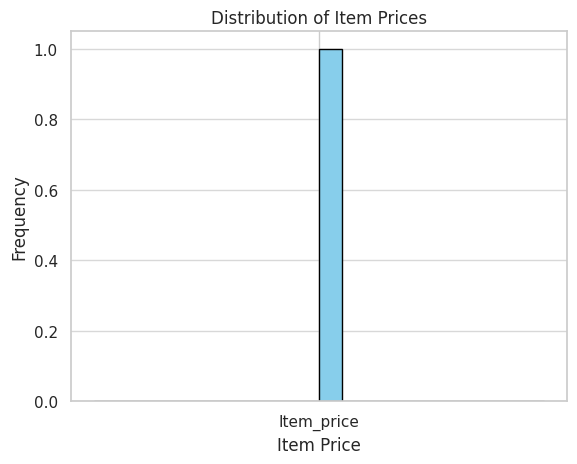

In [122]:
path ='/content/drive/MyDrive/Colab Notebooks/Customer_support_data.csv'
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv(path)

print("before")
print((df.isnull().sum() / len(df)) * 100)

# Corrected: Avoid chained assignment with inplace=True
df['Customer Remarks'] = df['Customer Remarks'].fillna('No Remarks')

# Drop rows missing Order_id
df = df.dropna(subset=['Order_id'])

# Corrected: Avoid chained assignment with inplace=True
df['order_date_time'] = df['order_date_time'].fillna('Unknown')
df['Customer_City'] = df['Customer_City'].fillna('Unknown City')
df['Product_category'] = df['Product_category'].fillna('Unknown Product')

# Fill numeric columns with median
# Corrected: Avoid chained assignment with inplace=True
df['Item_price'] = df['Item_price'].fillna(df['Item_price'].median())

print("\nAfter cleaning:")
print((df.isnull().sum() / len(df)) * 100)


print("after")
print((df.isnull().sum() / len(df)) * 100)

plt.hist('Item_price', bins=20, color='skyblue', edgecolor='black')
plt.title("Distribution of Item Prices")
plt.xlabel("Item Price")
plt.ylabel("Frequency")
plt.grid(axis='y', alpha=0.75)
plt.show()


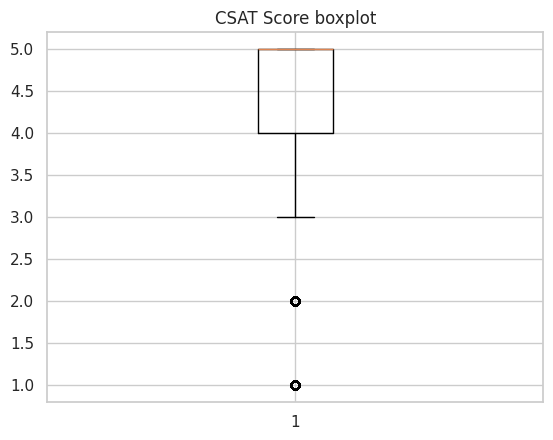

In [120]:
plt.boxplot(df['CSAT Score'])
plt.title("CSAT Score boxplot")
plt.show()

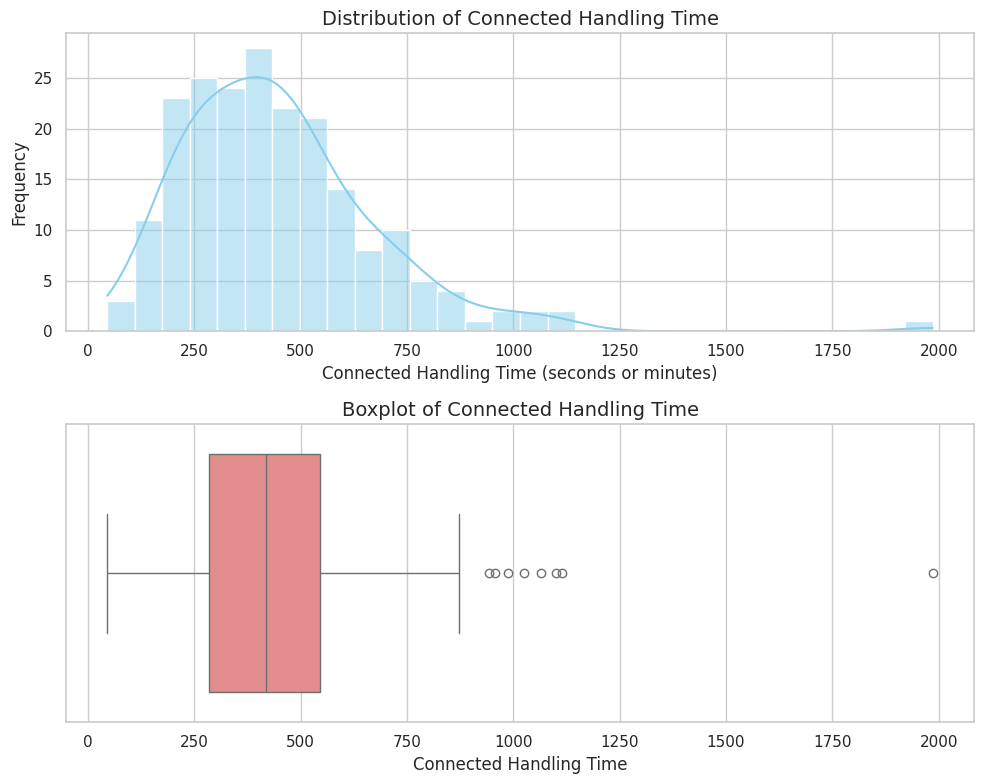

In [123]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the plot style
sns.set(style="whitegrid")

plt.figure(figsize=(10,8))

# 1️⃣ Histogram
plt.subplot(2,1,1)
sns.histplot(df['connected_handling_time'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Connected Handling Time', fontsize=14)
plt.xlabel('Connected Handling Time (seconds or minutes)')
plt.ylabel('Frequency')

# 2️⃣ Boxplot
plt.subplot(2,1,2)
sns.boxplot(x=df['connected_handling_time'], color='lightcoral')
plt.title('Boxplot of Connected Handling Time', fontsize=14)
plt.xlabel('Connected Handling Time')

plt.tight_layout()
plt.show()


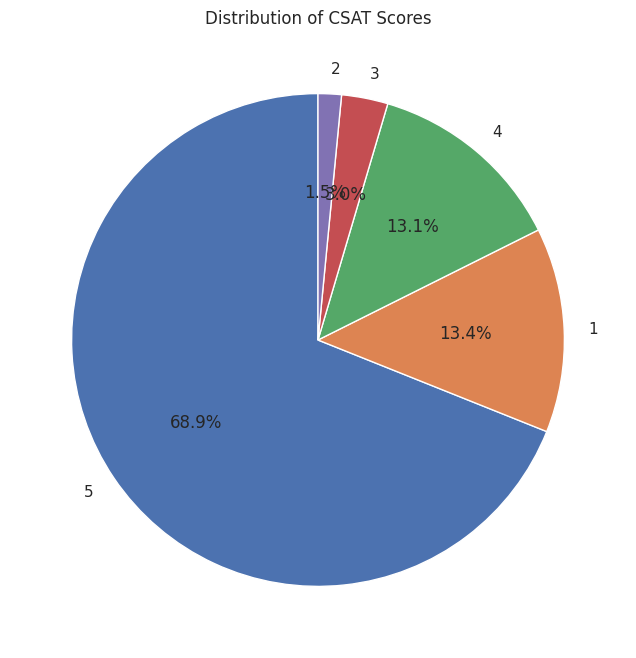

In [129]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming df DataFrame is already loaded and cleaned from previous steps

# Calculate the value counts for the 'CSAT Score' column
csat_counts = df['CSAT Score'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(csat_counts, labels=csat_counts.index, autopct='%1.1f%%', startangle=90)

plt.title("Distribution of CSAT Scores")
plt.show()

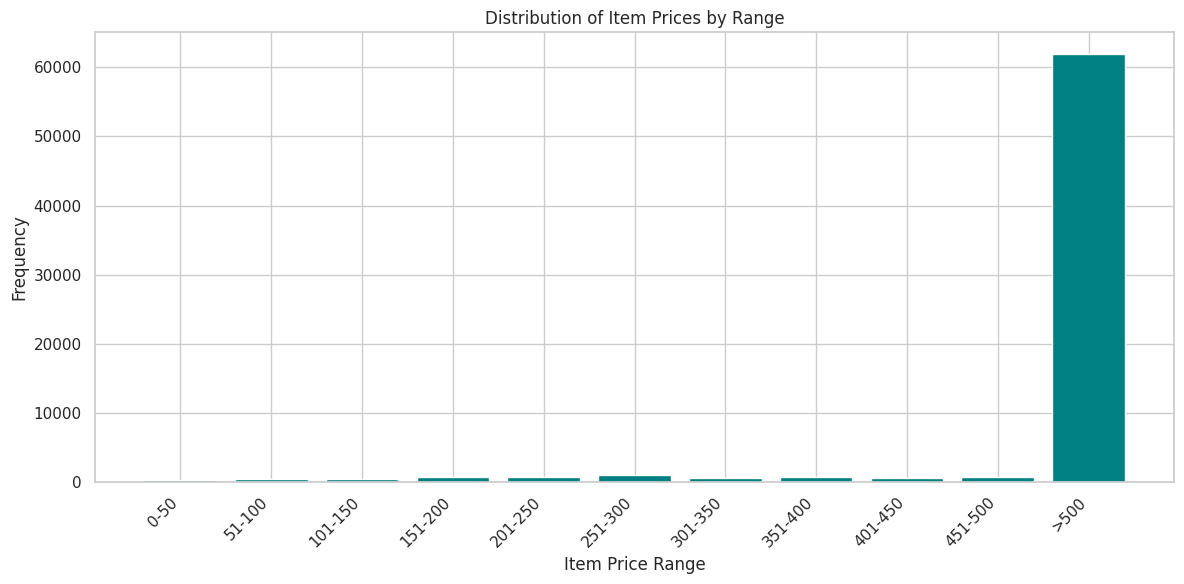

In [130]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming df DataFrame is already loaded and cleaned from previous steps

# Define price bins and labels
# You might need to adjust these bins based on the actual price range in your data
price_bins = [0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500, float('inf')]
price_labels = ['0-50', '51-100', '101-150', '151-200', '201-250', '251-300', '301-350', '351-400', '401-450', '451-500', '>500']

# Create a new column with price ranges
df['Price_Range'] = pd.cut(df['Item_price'], bins=price_bins, labels=price_labels, right=True, include_lowest=True)

# Count the occurrences in each price range
price_range_counts = df['Price_Range'].value_counts().sort_index()

# Create the bar chart
plt.figure(figsize=(12, 6))
plt.bar(price_range_counts.index, price_range_counts.values, color='teal')

plt.title("Distribution of Item Prices by Range")
plt.xlabel("Item Price Range")
plt.ylabel("Frequency")
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for readability
plt.tight_layout() # Adjust layout

plt.show()

### Task 6: How many tickets come from each channel_name? (Bar chart)

In [ ]:
import matplotlib.pyplot as plt

# Count the occurrences of each channel name
channel_counts = df['channel_name'].value_counts()

# Create a bar chart
plt.figure(figsize=(8, 6))
plt.bar(channel_counts.index, channel_counts.values, color='skyblue')

plt.title("Number of Tickets by Channel Name")
plt.xlabel("Channel Name")
plt.ylabel("Number of Tickets")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Insights:**
This bar chart shows the total count of tickets received through each channel name. It helps in identifying the most and least frequently used channels for customer support.

### Task 7: Which category has the highest number of tickets? (Bar chart - sorted)

In [ ]:
import matplotlib.pyplot as plt

# Count the occurrences of each category and sort them
category_counts = df['category'].value_counts().sort_values(ascending=False)

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(category_counts.index, category_counts.values, color='lightgreen')

plt.title("Number of Tickets by Category (Sorted)")
plt.xlabel("Category")
plt.ylabel("Number of Tickets")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Insights:**
This sorted bar chart displays the number of tickets for each category, ordered from highest to lowest. It clearly highlights the category with the highest number of tickets, indicating areas that might require more attention or resources.

### Task 8: Show me the distribution of tickets by Agent Shift. (Pie chart)

In [ ]:
import matplotlib.pyplot as plt

# Count the occurrences of each agent shift
shift_counts = df['Agent Shift'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(shift_counts, labels=shift_counts.index, autopct='%1.1f%%', startangle=140, colors=['gold', 'lightcoral', 'skyblue'])

plt.title("Distribution of Tickets by Agent Shift")
plt.show()

### Task 9: What are the top 10 Sub-category values? (Horizontal bar chart)

In [ ]:
import matplotlib.pyplot as plt

# Get the top 10 sub-category values
top_10_subcategories = df['Sub-category'].value_counts().head(10)

# Create a horizontal bar chart
plt.figure(figsize=(10, 8))
plt.barh(top_10_subcategories.index, top_10_subcategories.values, color='salmon')

plt.title("Top 10 Sub-categories by Number of Tickets")
plt.xlabel("Number of Tickets")
plt.ylabel("Sub-category")
plt.gca().invert_yaxis() # Invert y-axis to show the highest count at the top
plt.tight_layout()
plt.show()

**Insights:**
This horizontal bar chart displays the top 10 sub-categories with the highest number of tickets. It helps identify the most common specific issues or topics that customers are contacting support about.

### Task 10: How many tickets belong to each Tenure Bucket? (Bar chart)

In [ ]:
import matplotlib.pyplot as plt

# Count the occurrences of each tenure bucket
tenure_counts = df['Tenure Bucket'].value_counts()

# Create a bar chart
plt.figure(figsize=(8, 6))
plt.bar(tenure_counts.index, tenure_counts.values, color='lightblue')

plt.title("Number of Tickets by Tenure Bucket")
plt.xlabel("Tenure Bucket")
plt.ylabel("Number of Tickets")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Insights:**
This bar chart shows the distribution of tickets across different customer tenure buckets. It can reveal if there are certain tenure groups that require more support than others.

### Task 11: Is there a relationship between Item_price and CSAT Score? (Scatter plot)

In [ ]:
import matplotlib.pyplot as plt

# Create a scatter plot of Item_price vs CSAT Score
plt.figure(figsize=(10, 6))
plt.scatter(df['Item_price'], df['CSAT Score'], alpha=0.6, color='purple')

plt.title("Relationship between Item Price and CSAT Score")
plt.xlabel("Item Price")
plt.ylabel("CSAT Score")
plt.grid(True)
plt.show()

**Insights:**
This scatter plot visualizes the relationship between the item price and the CSAT score. It can help determine if there is any correlation or pattern between the price of an item and the customer satisfaction score received.

### Task 12: How does connected_handling_time affect CSAT Score? (Scatter plot + trend line)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'connected_handling_time' column exists and is numeric
# If not, you might need to handle missing values or data types first.

# Drop rows with missing values in the relevant columns for plotting
df_filtered = df.dropna(subset=['connected_handling_time', 'CSAT Score'])

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df_filtered['connected_handling_time'], df_filtered['CSAT Score'], alpha=0.6, color='darkorange', label='Data Points')

# Add a trend line (linear regression)
# Check if there are enough data points to fit a line
if len(df_filtered) > 1:
    z = np.polyfit(df_filtered['connected_handling_time'], df_filtered['CSAT Score'], 1)
    p = np.poly1d(z)
    plt.plot(df_filtered['connected_handling_time'], p(df_filtered['connected_handling_time']), color='red', linestyle='--', label=f'Trend Line (y={z[0]:.2f}x + {z[1]:.2f})')
else:
    print("Not enough data points to draw a trend line.")


plt.title("Relationship between Connected Handling Time and CSAT Score")
plt.xlabel("Connected Handling Time")
plt.ylabel("CSAT Score")
plt.grid(True)
plt.legend()
plt.show()

**Insights:**
This scatter plot, with an added trend line, explores the relationship between the connected handling time and the CSAT score. The trend line helps visualize the general direction of the relationship, indicating whether longer handling times tend to be associated with higher or lower CSAT scores.

### Task 13: Show me density or clusters of Item_price vs connected_handling_time. (Hexbin plot)

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'connected_handling_time' and 'Item_price' columns exist and are numeric
# Drop rows with missing values in the relevant columns for plotting
df_filtered = df.dropna(subset=['connected_handling_time', 'Item_price'])

# Create a hexbin plot
plt.figure(figsize=(10, 8))
plt.hexbin(df_filtered['Item_price'], df_filtered['connected_handling_time'], gridsize=20, cmap='Blues')
plt.colorbar(label='Count')

plt.title("Density Plot of Item Price vs Connected Handling Time")
plt.xlabel("Item Price")
plt.ylabel("Connected Handling Time")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

**Insights:**
This hexbin plot shows the density of data points across different combinations of item price and connected handling time. The color intensity of each hexagon represents the number of observations in that bin, helping to identify areas where certain price ranges and handling times are more common.

### Task 14: What is the average CSAT Score per channel_name? (Grouped bar chart)

In [ ]:
import matplotlib.pyplot as plt

# Calculate the average CSAT score per channel name
average_csat_by_channel = df.groupby('channel_name')['CSAT Score'].mean()

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(average_csat_by_channel.index, average_csat_by_channel.values, color='teal')

plt.title("Average CSAT Score by Channel Name")
plt.xlabel("Channel Name")
plt.ylabel("Average CSAT Score")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Insights:**
This bar chart compares the average CSAT score for each channel name. It helps identify which channels are associated with higher or lower customer satisfaction levels on average.

### Task 15: Show distribution of Item_price per category. (Multiple boxplots)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create multiple boxplots of Item_price per category
plt.figure(figsize=(12, 8))
sns.boxplot(x='category', y='Item_price', data=df) # Using seaborn for easier multiple boxplots

plt.title("Distribution of Item Price by Category")
plt.xlabel("Category")
plt.ylabel("Item Price")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Insights:**
These boxplots show the distribution of item prices within each category. They provide insights into the median price, the spread of prices (IQR), and potential outliers for items in different categories. This helps understand how item prices vary across product categories.

### Task 16: How does connected_handling_time vary by Agent Shift? (Boxplot)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'connected_handling_time' column exists and is numeric
# Drop rows with missing values in the relevant columns for plotting
df_filtered = df.dropna(subset=['connected_handling_time', 'Agent Shift'])

# Create a boxplot of connected_handling_time by Agent Shift
plt.figure(figsize=(10, 6))
sns.boxplot(x='Agent Shift', y='connected_handling_time', data=df_filtered) # Using seaborn for easier boxplot

plt.title("Distribution of Connected Handling Time by Agent Shift")
plt.xlabel("Agent Shift")
plt.ylabel("Connected Handling Time")
plt.tight_layout()
plt.show()

**Insights:**
This boxplot visualizes the distribution of connected handling time for each agent shift. It helps compare the typical handling times, variability, and potential outliers across different shifts.

### Task 17: Show mean and variability of Item_price across top 5 Product_category. (Error bar plot)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Get the top 5 product categories
top_5_product_categories = df['Product_category'].value_counts().head(5).index.tolist()

# Filter the DataFrame to include only the top 5 categories
df_top_categories = df[df['Product_category'].isin(top_5_product_categories)].copy()

# Calculate the mean and standard deviation of Item_price for each top category
mean_price = df_top_categories.groupby('Product_category')['Item_price'].mean()
std_price = df_top_categories.groupby('Product_category')['Item_price'].std()

# Create an error bar plot
plt.figure(figsize=(12, 6))
plt.errorbar(mean_price.index, mean_price.values, yerr=std_price.values, fmt='o', capsize=5, color='green')

plt.title("Mean Item Price with Variability Across Top 5 Product Categories")
plt.xlabel("Product Category")
plt.ylabel("Item Price (Mean with Std Dev)")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()
plt.show()

**Insights:**
This error bar plot shows the mean item price for the top 5 product categories, with error bars representing the standard deviation. It provides insights into the typical price for items in these categories and the variability around that mean.

### Task 18: How do CSAT scores differ across Tenure Bucket? (Bar chart)

In [ ]:
import matplotlib.pyplot as plt

# Calculate the average CSAT score per tenure bucket
average_csat_by_tenure = df.groupby('Tenure Bucket')['CSAT Score'].mean()

# Create a bar chart
plt.figure(figsize=(8, 6))
plt.bar(average_csat_by_tenure.index, average_csat_by_tenure.values, color='cornflowerblue')

plt.title("Average CSAT Score by Tenure Bucket")
plt.xlabel("Tenure Bucket")
plt.ylabel("Average CSAT Score")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Insights:**
This bar chart compares the average CSAT score across different customer tenure buckets. It can reveal if there are differences in satisfaction levels based on how long a customer has been with the service.

### Task 19: Show the number of tickets by channel_name and category together. (Stacked bar chart)

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Create a pivot table to count tickets by channel_name and category
pivot_table = df.pivot_table(index='channel_name', columns='category', aggfunc='size', fill_value=0)

# Create a stacked bar chart
plt.figure(figsize=(12, 8))
pivot_table.plot(kind='bar', stacked=True, ax=plt.gca())

plt.title("Number of Tickets by Channel Name and Category")
plt.xlabel("Channel Name")
plt.ylabel("Number of Tickets")
plt.xticks(rotation=45, ha='right')
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

**Insights:**
This stacked bar chart shows the breakdown of ticket categories within each channel name. It helps understand which categories are most prevalent in each channel and how the distribution of categories differs across channels.

**Insights:**
This pie chart illustrates the proportion of tickets handled during each agent shift. It helps in understanding the workload distribution across different shifts.

### Task 20: How does Agent Shift distribution differ across category? (Stacked bar or grouped bar chart)

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Create a pivot table to count tickets by category and agent shift
pivot_table_shift_category = df.pivot_table(index='category', columns='Agent Shift', aggfunc='size', fill_value=0)

# Create a stacked bar chart
plt.figure(figsize=(14, 8))
pivot_table_shift_category.plot(kind='bar', stacked=True, ax=plt.gca())

plt.title("Agent Shift Distribution Across Categories")
plt.xlabel("Category")
plt.ylabel("Number of Tickets")
plt.xticks(rotation=45, ha='right')
plt.legend(title='Agent Shift', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### Task 21: How many tickets were created per day? (Line plot)

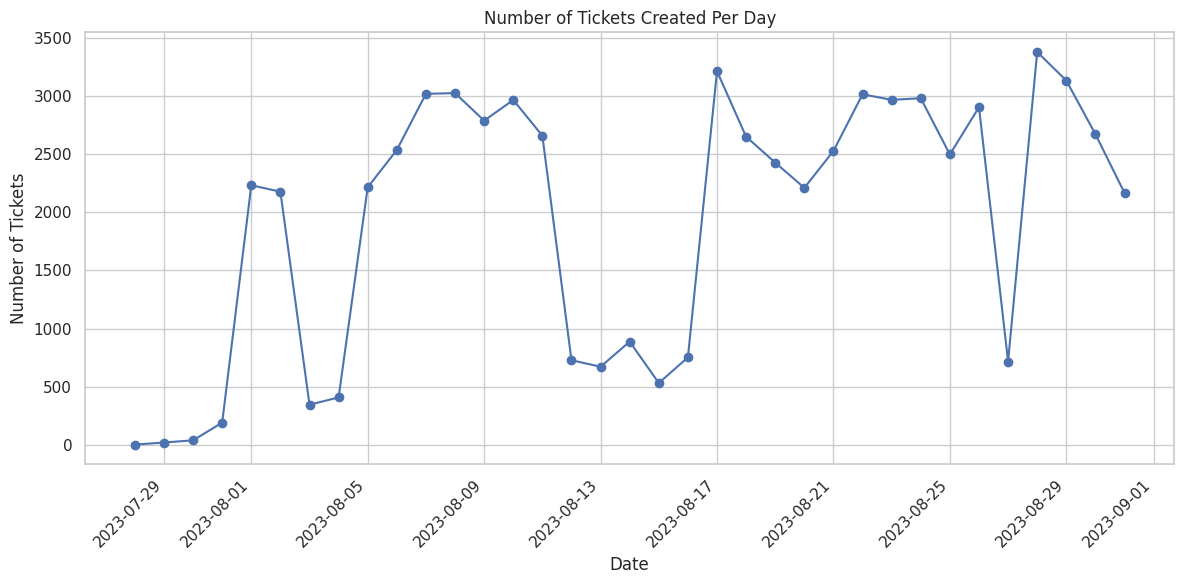

In [139]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'Issue_reported at' is the column for ticket creation time
# Convert 'Issue_reported at' to datetime objects
df['Issue_reported at'] = pd.to_datetime(df['Issue_reported at'], format='%d/%m/%Y %H:%M', dayfirst=True)

# Count tickets per day
tickets_per_day = df.groupby(df['Issue_reported at'].dt.date).size()

# Create a line plot
plt.figure(figsize=(12, 6))
plt.plot(tickets_per_day.index, tickets_per_day.values, marker='o', linestyle='-')

plt.title("Number of Tickets Created Per Day")
plt.xlabel("Date")
plt.ylabel("Number of Tickets")
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.tight_layout()
plt.show()

**Insights:**
This line plot shows the daily trend of ticket creation volume. It helps identify days with high or low ticket counts and observe any daily patterns or fluctuations.

### Task 22: Show daily trend of average CSAT Score. (Line plot)

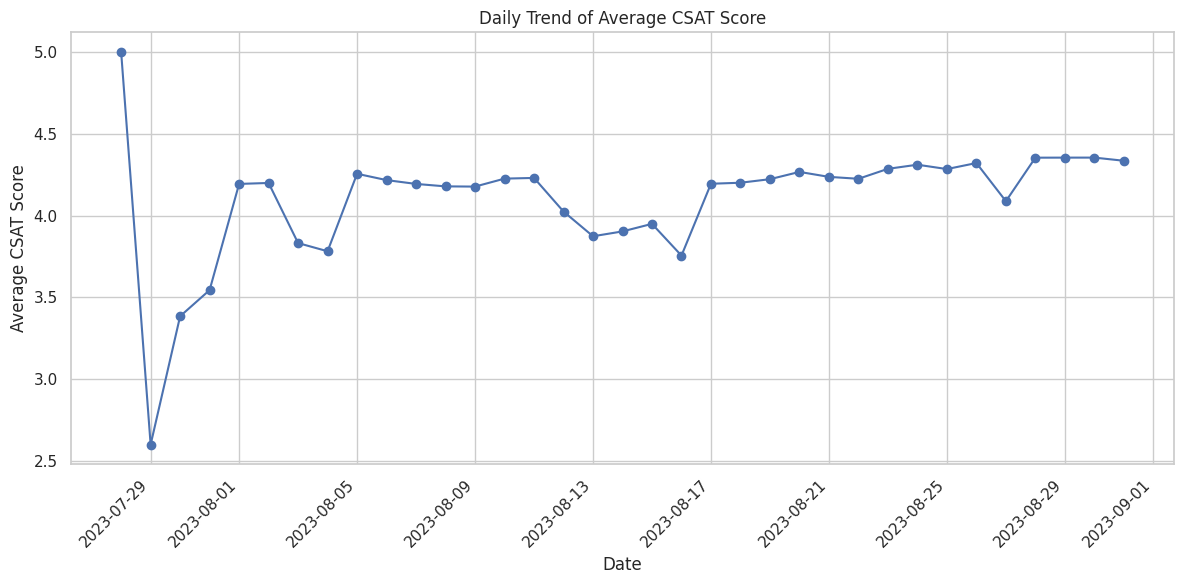

In [140]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'Issue_reported at' is related to when the CSAT score is applicable
# (adjust column if needed for survey response date)
# Convert 'Issue_reported at' to datetime objects if not already
df['Issue_reported at'] = pd.to_datetime(df['Issue_reported at'], format='%d/%m/%Y %H:%M', dayfirst=True)

# Calculate average CSAT score per day
average_csat_per_day = df.groupby(df['Issue_reported at'].dt.date)['CSAT Score'].mean()

# Create a line plot
plt.figure(figsize=(12, 6))
plt.plot(average_csat_per_day.index, average_csat_per_day.values, marker='o', linestyle='-')

plt.title("Daily Trend of Average CSAT Score")
plt.xlabel("Date")
plt.ylabel("Average CSAT Score")
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.tight_layout()
plt.show()

**Insights:**
This line plot visualizes the daily trend of the average CSAT score. It helps observe how customer satisfaction levels change from day to day and identify any periods with notable increases or decreases in average CSAT.

### Task 23: Plot number of issues reported weekly. (Bar chart - aggregated)

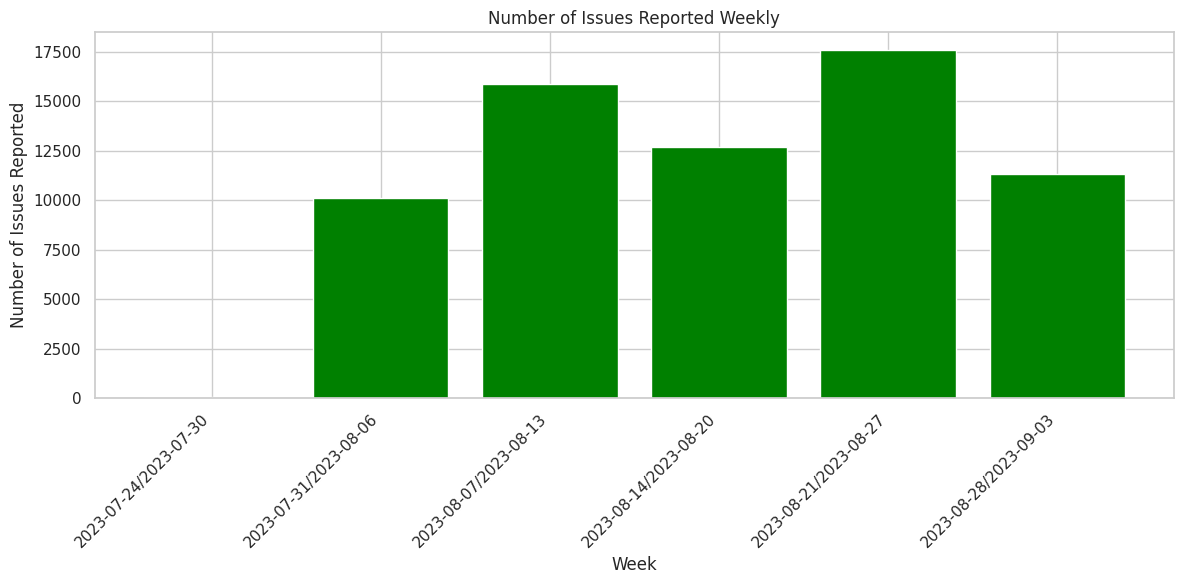

In [141]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'Issue_reported at' is the column for issue reporting time
# Convert 'Issue_reported at' to datetime objects if not already
df['Issue_reported at'] = pd.to_datetime(df['Issue_reported at'], format='%d/%m/%Y %H:%M', dayfirst=True)

# Aggregate tickets by week
df['Week'] = df['Issue_reported at'].dt.to_period('W')
weekly_issues = df.groupby('Week').size().reset_index(name='Count')
weekly_issues['Week'] = weekly_issues['Week'].astype(str) # Convert Period to string for plotting

# Create a bar chart
plt.figure(figsize=(12, 6))
plt.bar(weekly_issues['Week'], weekly_issues['Count'], color='green')

plt.title("Number of Issues Reported Weekly")
plt.xlabel("Week")
plt.ylabel("Number of Issues Reported")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Insights:**
This bar chart shows the total number of issues reported each week. It helps identify weekly patterns in issue volume and pinpoint weeks with unusually high or low activity.

### Task 24: What is the monthly pattern of ticket volume? (Line plot with month aggregation)

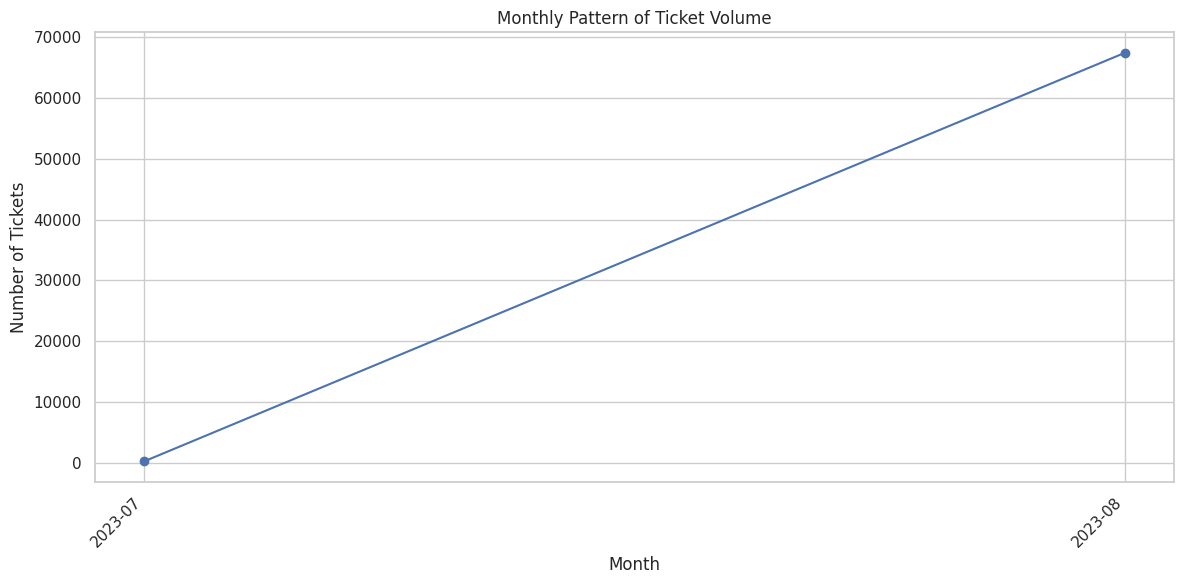

In [142]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'Issue_reported at' is the column for issue reporting time
# Convert 'Issue_reported at' to datetime objects if not already
df['Issue_reported at'] = pd.to_datetime(df['Issue_reported at'], format='%d/%m/%Y %H:%M', dayfirst=True)

# Aggregate tickets by month
df['Month'] = df['Issue_reported at'].dt.to_period('M')
monthly_issues = df.groupby('Month').size().reset_index(name='Count')
monthly_issues['Month'] = monthly_issues['Month'].astype(str) # Convert Period to string for plotting

# Create a line plot
plt.figure(figsize=(12, 6))
plt.plot(monthly_issues['Month'], monthly_issues['Count'], marker='o', linestyle='-')

plt.title("Monthly Pattern of Ticket Volume")
plt.xlabel("Month")
plt.ylabel("Number of Tickets")
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.tight_layout()
plt.show()

**Insights:**
This line plot illustrates the monthly trend in ticket volume. It helps identify any seasonal patterns or significant changes in the number of tickets received on a monthly basis.

### Task 25: How does ticket volume differ by channel_name over time? (Multi-line plot)

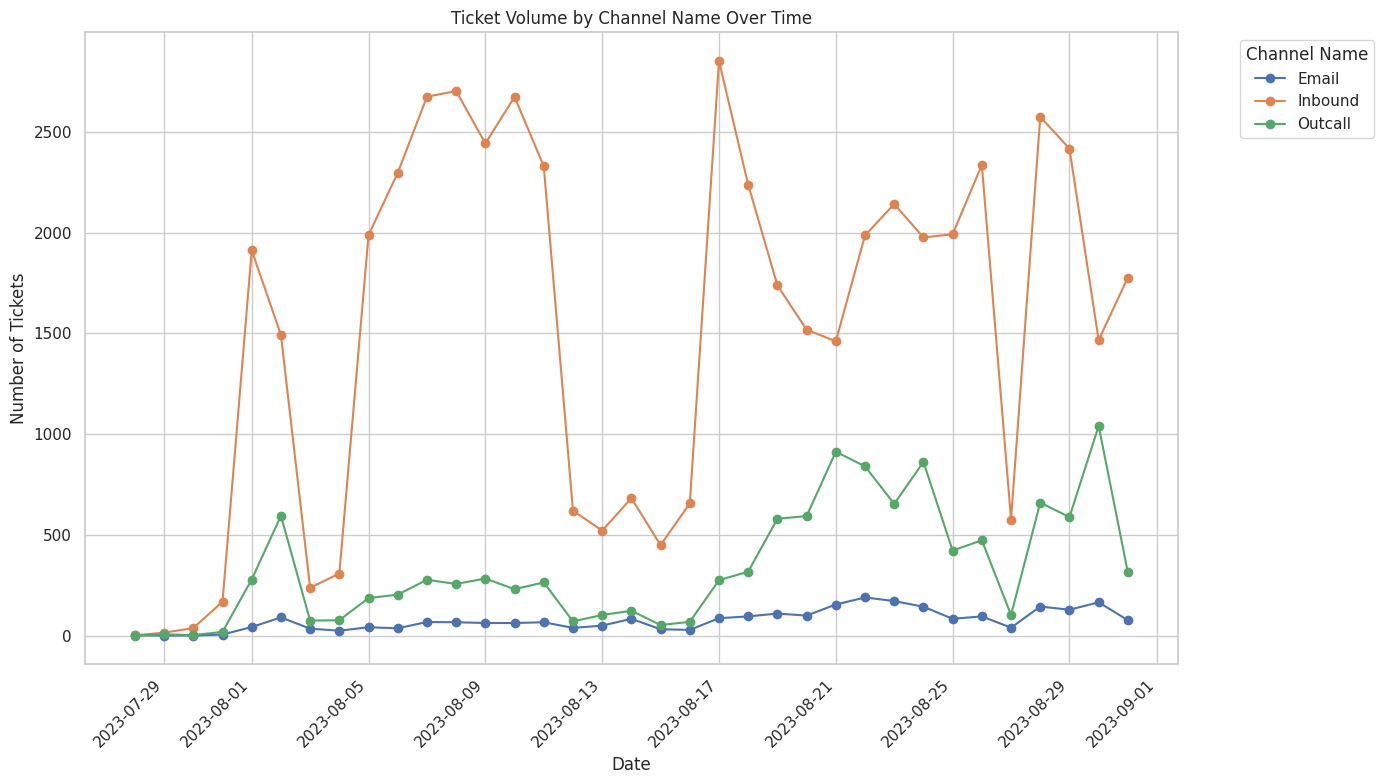

In [143]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'Issue_reported at' is the column for issue reporting time
# Convert 'Issue_reported at' to datetime objects if not already
df['Issue_reported at'] = pd.to_datetime(df['Issue_reported at'], format='%d/%m/%Y %H:%M', dayfirst=True)

# Group by date and channel name and count tickets
tickets_by_channel_time = df.groupby([df['Issue_reported at'].dt.date, 'channel_name']).size().unstack(fill_value=0)

# Create a multi-line plot
plt.figure(figsize=(14, 8))
tickets_by_channel_time.plot(kind='line', marker='o', linestyle='-', ax=plt.gca())

plt.title("Ticket Volume by Channel Name Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Tickets")
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.legend(title='Channel Name', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

**Insights:**
This multi-line plot shows the ticket volume for each channel name over time. It allows for a comparison of the trends across different channels and helps identify if certain channels experience higher or lower volumes at different periods.

### Task 26: Show the time lag between Issue_reported at and issue_responded. (Line or scatter plot - response time trend)

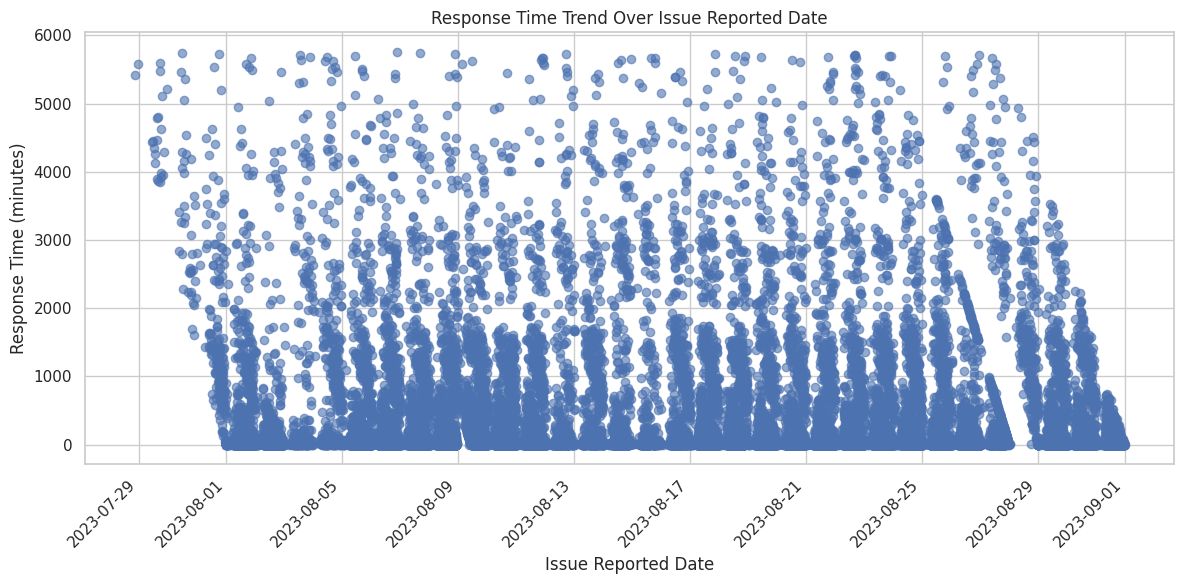

In [144]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'Issue_reported at' and 'issue_responded' are datetime columns
# Convert to datetime objects if not already
df['Issue_reported at'] = pd.to_datetime(df['Issue_reported at'], format='%d/%m/%Y %H:%M', dayfirst=True)
df['issue_responded'] = pd.to_datetime(df['issue_responded'], format='%d/%m/%Y %H:%M', dayfirst=True)

# Calculate the time difference in a suitable unit (e.g., hours, minutes, or seconds)
df['Response_Time'] = (df['issue_responded'] - df['Issue_reported at']).dt.total_seconds() / 60 # in minutes

# Drop rows where response time is missing or negative (if applicable)
df_response_time = df.dropna(subset=['Response_Time']).copy()
df_response_time = df_response_time[df_response_time['Response_Time'] >= 0]


# Plot the response time over the issue reported date
plt.figure(figsize=(12, 6))
plt.scatter(df_response_time['Issue_reported at'], df_response_time['Response_Time'], alpha=0.6)

plt.title("Response Time Trend Over Issue Reported Date")
plt.xlabel("Issue Reported Date")
plt.ylabel("Response Time (minutes)")
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.tight_layout()
plt.show()

**Insights:**
This scatter plot shows the response time for each issue over the date it was reported. It helps visualize the trend in response times over time and identify any periods where response times were particularly long or short.

### Task 27: Show the volume of resolved issues over time. (Line plot)

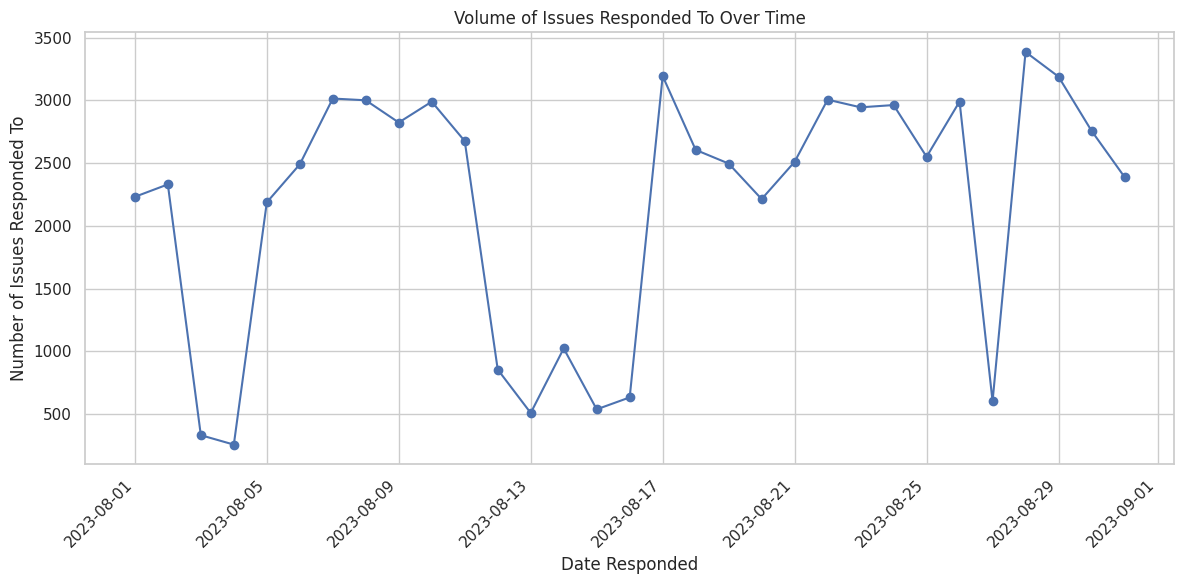

In [145]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming you have a column indicating resolution status (e.g., 'Status')
# and a column for resolution date (e.g., 'Resolution_Date').
# Replace 'Status' and 'Resolution_Date' with your actual column names.
# For this example, let's assume 'issue_responded' is a proxy for resolution date
# and we consider all issues in the dataset as "resolved" for simplicity.

# Convert 'issue_responded' to datetime objects if not already
df['issue_responded'] = pd.to_datetime(df['issue_responded'], format='%d/%m/%Y %H:%M', dayfirst=True)

# Count issues responded to per day (as a proxy for resolved issues)
resolved_issues_per_day = df.groupby(df['issue_responded'].dt.date).size()

# Create a line plot
plt.figure(figsize=(12, 6))
plt.plot(resolved_issues_per_day.index, resolved_issues_per_day.values, marker='o', linestyle='-')

plt.title("Volume of Issues Responded To Over Time")
plt.xlabel("Date Responded")
plt.ylabel("Number of Issues Responded To")
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.tight_layout()
plt.show()

**Insights:**
This line plot shows the daily volume of issues responded to (used as a proxy for resolved issues). It helps track the resolution rate over time and identify any patterns or changes in the speed of issue resolution.

### Task 28: What is the peak hour or day for incoming tickets? (Bar chart - hourly/daily distribution)

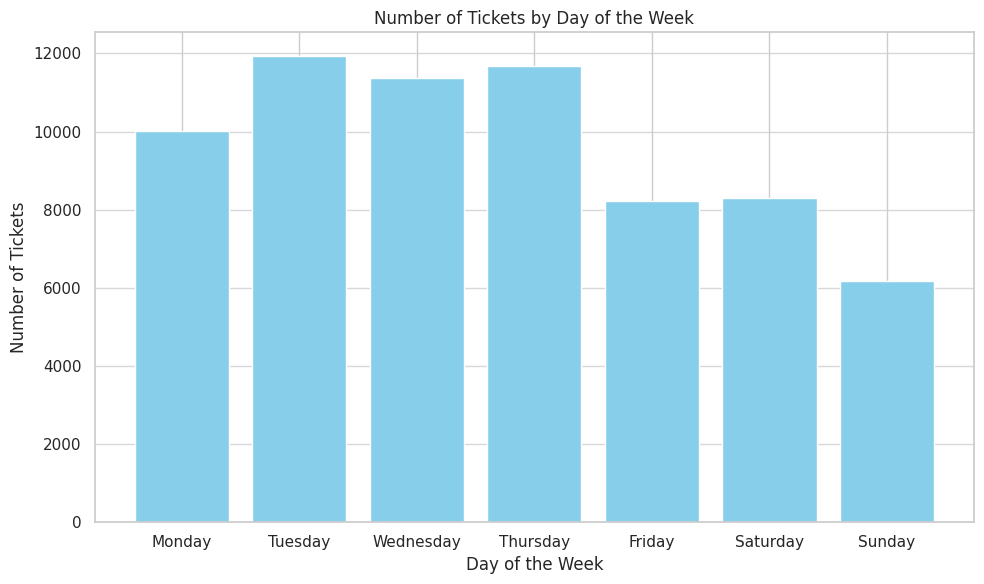

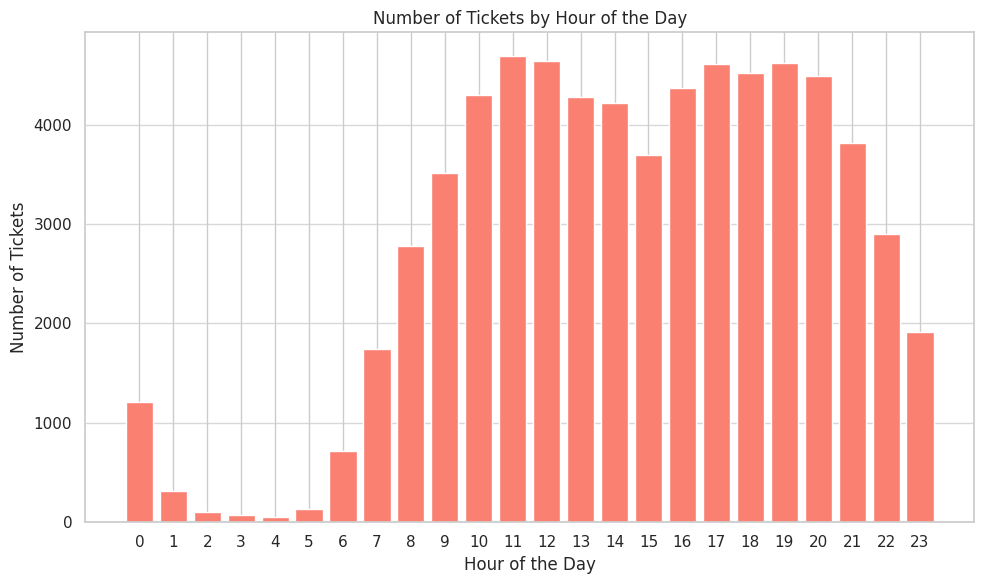

In [146]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'Issue_reported at' is the column for ticket creation time
# Convert 'Issue_reported at' to datetime objects if not already
df['Issue_reported at'] = pd.to_datetime(df['Issue_reported at'], format='%d/%m/%Y %H:%M', dayfirst=True)

# Analyze peak day
df['Day_of_Week'] = df['Issue_reported at'].dt.day_name()
daily_counts = df['Day_of_Week'].value_counts().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

plt.figure(figsize=(10, 6))
plt.bar(daily_counts.index, daily_counts.values, color='skyblue')
plt.title("Number of Tickets by Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Number of Tickets")
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()
plt.show()


# Analyze peak hour
df['Hour_of_Day'] = df['Issue_reported at'].dt.hour
hourly_counts = df['Hour_of_Day'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
plt.bar(hourly_counts.index, hourly_counts.values, color='salmon')
plt.title("Number of Tickets by Hour of the Day")
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Tickets")
plt.xticks(hourly_counts.index)
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()
plt.show()

**Insights:**
These bar charts show the distribution of ticket volume by day of the week and hour of the day. They help identify the peak days and hours for incoming tickets, which can be useful for resource allocation and staffing.